# Chicago Food Inspections

##### Project developed by Nuno Gomes (up199300242) and José Pinto (up201603713) for the course CC4060 -- Introduction to Data Science.
###### Masters of Data Science (FCUP)

<div id= 'toc'/>

---
## Table of Contents
### 1. [Intent and goals](#intent)
 #### 1.1 [Content](#content)
### 2. [Context](#context)
### 3. [Data Cleaning](#data-cleaning)
 #### 3.1 [Missing values](#missing-values)
 #### 3.2 [Dropping unnecessary columns](#unnecessary-columns)
 #### 3.3 [Handling missing values in rows](#unnecessary-rows)
  ##### 3.3.1 [Licences](#missing-licences)
  ##### 3.3.2 [Risk](#risk)
  ##### 3.3.3 [Violations](#violations)
 #### 3.4 [Using string methods to clean features](#string-methods)
  ##### 3.4.1 [Cleaning dates](#dates)
  ##### 3.4.2 [Creating time delta](#time-delta)
  ##### 3.4.3 [Simplify **Address** feature](#address)
  ##### 3.4.4 [Simplify **Inspection Type** feature](#inspection-type)
   ###### [Re-inspections](#re-inspections) \* [Canvass](#canvass) \* [Complaints](#complaints) \* [Consultations](#consultations) \* [Licenses](#licenses) \* [Suspected food poisoning](#food-poisoning) \* [Task-force inspections](#task-force) \* [Additional cleaning](#additional-cleaning)
  ##### 3.4.5 [Simplify **Results** feature](#results)
  ##### 3.4.6 [Simplify **Violations** feature](#simp-violations)
   ###### [Identification of all violations reported](#violations-id) \* [Extraction of violation numbers](#violations-numbers)
  ##### 3.4.7 [Clean risk feature](#risk-cleaning)
### 4. [Approximate geographical position of food establishments](#maps)
### 5. [Modeling](#modeling)
 #### 5.1 [Pre Processing](#pre-processing)
  ##### 5.1.1 [Change variable type](#change-type) 
  ##### 5.1.2 [Create dummie variables](#dummies)
  ##### 5.1.3 [Normalize values](#normalization)
  ##### 5.1.4 [Train Test Validation Split](#split)
 #### 5.2 [Decision Trees](#tree-modeling)
  ##### 5.2.1 [Train tree and tune hiperparameters](#tree-tunning)
  ##### 5.2.2 [Evaluate decision tree results](#tree-evaluation)
 #### 5.3 [Random Forests](#forest-modeling)
 #### 5.4 [K nearest neighbours](#knn-modeling)
  ##### 5.4.1 [KNN pre processing](#knn-pre-processing)
  ##### 5.4.2 [KNN select number of neighbours](#knn-kneighbours)
  ##### 5.4.3 [KNN evaluation](#knn-evaluation)
 #### 5.5 [Linear Regression](#lr)
  ##### 5.5.1 [Linear Regression pre processing](#lr-pre-processing)
  ##### 5.5.2 [Linear Regression Modeling](#lr-modeling)
  ##### 5.5.3 [Linear regression evaluation](#lr-evaluation)
 #### 5.6 [Logistic Regression](#LogR)
  ##### 5.6.1 [Logistic Regression pre processing](#logR-pre-processing)
  ##### 5.6.2 [Logistic Regression Modeling](#logR-modeling)
  ##### 5.6.3 [Logistic regression evaluation](#logR-evaluation)
 #### 5.7 [Naive bayes](#NBayes)
 #### 5.8 [Neural networks](#neural-networks)
  ##### 5.8.1 [Neural network modeling](#NN-modeling)
  ##### 5.8.2 [Neural network evaluation](#NN-evaluation)
 #### 5.9 [Full ensemble](#full-ensemble)
---

<div id= 'intent'/>

## 1 Intent and goals

In this project we assumed the objective of predicting wether or not a given food establishment would pass a food inspection.
The goal would be to prioritize inspections to the establishments more likely to fail the inspection, with the intent to improve public health and enforce regulations.

With this goal in mind, we obtained a dataset of food inspections from the city of Chicago, wich we analised throughout the project.

[TOC](#toc)

<div id= 'content'/>

### 1.1 Content

This data set consists of a collection of daily inspections of restaurants and other food establishments in the urban area of Chicago from 2010/01/01 to the present.
Inspections are performed by staff from the Chicago Department of Public Health’s Food Protection Program using a standardised procedure.
The results of the inspection were input into a database, then reviewed and approved by a State of Illinois
Licensed Environmental Health Practitioner (LEHP).

For descriptions of the data elements included in this set, go to this [link](#http://bit.ly/tS9IE8).

[Link to the note](#http://bit.ly/2yWd2JB) about 2018/7/1 change to food inspection procedures that affects the data in this dataset.

The result of the inspections (**pass**, **pass with conditions** or **fail**), as well as the violations noted, are based on the findings identified and reported by the inspector at the time of the inspection, and may not reflect the findings noted at other times.
For more information about Food Inspections, go to the [Food Protection Services website](#https://www.cityofchicago.org/city/en/depts/cdph/provdrs/healthy_restaurants/svcs/food-protection-services.html).

[TOC](#toc)

<div id= 'context'/>

## 2 Context
This is a dataset hosted by the City of Chicago.
The city has an open data platform found [here](#https://data.cityofchicago.org/Health-Human-Services/Food-Inspections/4ijn-s7e5/data), and they update their information according to the amount of data that is brought in.
The dataset is updated daily.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df= pd.read_csv("food-inspections.csv")
df

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,...,Results,Violations,Latitude,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards
0,2316058,CHICAGO TAICHI BUBBLE TEA,CHICAGO TAICHI BUBBLE TEA,2694548.0,Restaurant,Risk 1 (High),6800 N SHERIDAN RD,CHICAGO,IL,60626.0,...,Pass,47. FOOD & NON-FOOD CONTACT SURFACES CLEANABLE...,42.005587,-87.661077,"{'longitude': '42.00558686485114', 'latitude':...",NaN,NaN,NaN,NaN,NaN
1,2316065,Krispy Kreme Doughnuts,Krispy Kreme Doughnuts,2689327.0,Restaurant,Risk 2 (Medium),108 N STATE ST,CHICAGO,IL,60602.0,...,Pass,NaN,41.883423,-87.628022,"{'longitude': '41.88342263701488', 'latitude':...",NaN,NaN,NaN,NaN,NaN
2,2316054,SUBWAY,SUBWAY,2590201.0,Restaurant,Risk 1 (High),2512 W NORTH AVE,CHICAGO,IL,60647.0,...,Pass,39. CONTAMINATION PREVENTED DURING FOOD PREPAR...,41.910399,-87.690207,"{'longitude': '41.910398978211525', 'latitude'...",NaN,NaN,NaN,NaN,NaN
3,2316057,LITTLE GENIUS COMMUNITY DAYCARE 11,LITTLE GENIUS COMMUNITY DAYCARE,2359451.0,Daycare (2 - 6 Years),Risk 1 (High),1000 W 103RD ST,CHICAGO,IL,60643.0,...,Pass,"55. PHYSICAL FACILITIES INSTALLED, MAINTAINED ...",41.706982,-87.647758,"{'longitude': '41.706982259265786', 'latitude'...",NaN,NaN,NaN,NaN,NaN
4,2316063,PAN ARTESANAL,PAN ARTESANAL,2602146.0,Bakery,Risk 1 (High),3724 W FULLERTON AVE,CHICAGO,IL,60647.0,...,Pass w/ Conditions,23. PROPER DATE MARKING AND DISPOSITION - Comm...,41.924670,-87.720445,"{'longitude': '41.92467025197142', 'latitude':...",NaN,NaN,NaN,NaN,NaN
5,2316003,"BRIGHT SCHOLARS ACADEMY, LLC",JELLYBEAN DAYCARE,2506770.0,Children's Services Facility,Risk 1 (High),8501-8503 S ASHLAND AVE,CHICAGO,IL,60620.0,...,Pass,"53. TOILET FACILITIES: PROPERLY CONSTRUCTED, S...",41.739343,-87.663008,"{'longitude': '41.739343208088016', 'latitude'...",NaN,NaN,NaN,NaN,NaN
6,2316001,QUESADILLA LA REINA DEL SUR INC,QUESADILLA LA REINA DEL SUR INC,2098412.0,Restaurant,Risk 1 (High),2235 N WESTERN AVE,CHICAGO,IL,60647.0,...,Pass w/ Conditions,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.922711,-87.687428,"{'longitude': '41.92271136874486', 'latitude':...",NaN,NaN,NaN,NaN,NaN
7,2316040,LONGMAN & EAGLE,LONGMAN & EAGLE,80875.0,Restaurant,Risk 1 (High),2657 N KEDZIE AVE,CHICAGO,IL,60647.0,...,Pass w/ Conditions,9. NO BARE HAND CONTACT WITH RTE FOOD OR A PRE...,41.930126,-87.707231,"{'longitude': '41.93012611532404', 'latitude':...",NaN,NaN,NaN,NaN,NaN
8,2315977,EAST ROOM,EAST ROOM,2263696.0,TAVERN,Risk 3 (Low),2352-2358 N MILWAUKEE AVE,CHICAGO,IL,60647.0,...,Pass w/ Conditions,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.923873,-87.699163,"{'longitude': '41.92387309514714', 'latitude':...",NaN,NaN,NaN,NaN,NaN
9,2316042,CHARCOAL FLAME,CHARCOAL FLAME,2671261.0,Restaurant,Risk 1 (High),7003 N CLARK ST,CHICAGO,IL,60626.0,...,Fail,"1. PERSON IN CHARGE PRESENT, DEMONSTRATES KNOW...",42.009133,-87.673846,"{'longitude': '42.00913302441507', 'latitude':...",NaN,NaN,NaN,NaN,NaN


In [6]:
# List names of columns
pd.Series(df.columns)

0                  Inspection ID
1                       DBA Name
2                       AKA Name
3                      License #
4                  Facility Type
5                           Risk
6                        Address
7                           City
8                          State
9                            Zip
10               Inspection Date
11               Inspection Type
12                       Results
13                    Violations
14                      Latitude
15                     Longitude
16                      Location
17    Historical Wards 2003-2015
18                     Zip Codes
19               Community Areas
20                 Census Tracts
21                         Wards
dtype: object

- **DBA Name**: Doing Business As -- legal name of establishment.
- **AKA**: Also Known As -- name the public would know the establishment as.
- **(Historical) Wards**: (historical) political geographical districts.
- **Census Tracts**: areas roughly equivalent to neighborhoods established by the Bureau of Census for analysing populations.

[TOC](#toc)

<div id= 'data-cleaning'/>

## 3 Data Cleaning

The adopted approach was the following:

- Checking for and removing missing values:
    - Dropping columns with only `NaN`s;
    - Remove rows with `NaN`s when a missing value is not relevant.
- Dropping unnecessary columns in the DataFrame;
- Using string methods to clean features.

We decided not to apply any technique to replace `NaN`s for most of the features because of the nature of the problem (we are trying to guess what will be the result of an inspection to a food establishment and filling in missing values with a k-neighbouring technique, for instance, would not improve our model) and, on the other hand, because the dataset has enough instances to allow us to safely discard a portion of them.

[TOC](#toc)

<div id= 'missing-values'/>

### 3.1 Missing values

In [7]:
# convert non-standard missing values to `NaN`s
df= df.replace(['-', 'na'], np.nan)
# number of rows with missing values and respective percentage
nanrows= df.isnull().any(axis= 1).sum()
nrows= len(df)
print("The DataFrame has %d out of %d rows with missing values, i.e., %d%% of the rows have missing values." % 
      (nanrows, nrows, nanrows/nrows*100))

The DataFrame has 194615 out of 194615 rows with missing values, i.e., 100% of the rows have missing values.


In [8]:
df.iloc[0]

Inspection ID                                                           2316058
DBA Name                                              CHICAGO TAICHI BUBBLE TEA
AKA Name                                              CHICAGO TAICHI BUBBLE TEA
License #                                                           2.69455e+06
Facility Type                                                        Restaurant
Risk                                                              Risk 1 (High)
Address                                                     6800 N SHERIDAN RD 
City                                                                    CHICAGO
State                                                                        IL
Zip                                                                       60626
Inspection Date                                         2019-10-18T00:00:00.000
Inspection Type                                           License Re-Inspection
Results                                 

All rows have `NaN` values, which might indicate the presence of empty columns.
We verified how many variables had only `NaN` values.

In [9]:
print("There are %d features containing only NaN values." % df.isnull().all().sum())

There are 5 features containing only NaN values.


In [10]:
df.isnull().all()

Inspection ID                 False
DBA Name                      False
AKA Name                      False
License #                     False
Facility Type                 False
Risk                          False
Address                       False
City                          False
State                         False
Zip                           False
Inspection Date               False
Inspection Type               False
Results                       False
Violations                    False
Latitude                      False
Longitude                     False
Location                      False
Historical Wards 2003-2015     True
Zip Codes                      True
Community Areas                True
Census Tracts                  True
Wards                          True
dtype: bool

The columns with only missing values are **Historical Wards 2003-2015**, **Zip Codes**, **Community Areas**, **Census Tracts**, and **Wards**.

In [11]:
nrows= len(df.index)
print("Number of rows in DataFrame: %d.\n" % nrows)
print("Number of rows with valid records in feature...\n")
for col in df.columns[-5:]:
    print("- %s: %d." % (col, df[col].notnull().sum()))

Number of rows in DataFrame: 194615.

Number of rows with valid records in feature...

- Historical Wards 2003-2015: 0.
- Zip Codes: 0.
- Community Areas: 0.
- Census Tracts: 0.
- Wards: 0.


Therefore, the aforementioned columns contained only `NaN` values and were discarded.

In [12]:
df= df.drop(['Historical Wards 2003-2015', 'Zip Codes', 'Community Areas', 'Census Tracts', 'Wards'], axis= 1)
df.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,2316058,CHICAGO TAICHI BUBBLE TEA,CHICAGO TAICHI BUBBLE TEA,2694548.0,Restaurant,Risk 1 (High),6800 N SHERIDAN RD,CHICAGO,IL,60626.0,2019-10-18T00:00:00.000,License Re-Inspection,Pass,47. FOOD & NON-FOOD CONTACT SURFACES CLEANABLE...,42.005587,-87.661077,"{'longitude': '42.00558686485114', 'latitude':..."
1,2316065,Krispy Kreme Doughnuts,Krispy Kreme Doughnuts,2689327.0,Restaurant,Risk 2 (Medium),108 N STATE ST,CHICAGO,IL,60602.0,2019-10-18T00:00:00.000,License,Pass,NaN,41.883423,-87.628022,"{'longitude': '41.88342263701488', 'latitude':..."
2,2316054,SUBWAY,SUBWAY,2590201.0,Restaurant,Risk 1 (High),2512 W NORTH AVE,CHICAGO,IL,60647.0,2019-10-18T00:00:00.000,Complaint Re-Inspection,Pass,39. CONTAMINATION PREVENTED DURING FOOD PREPAR...,41.910399,-87.690207,"{'longitude': '41.910398978211525', 'latitude'..."
3,2316057,LITTLE GENIUS COMMUNITY DAYCARE 11,LITTLE GENIUS COMMUNITY DAYCARE,2359451.0,Daycare (2 - 6 Years),Risk 1 (High),1000 W 103RD ST,CHICAGO,IL,60643.0,2019-10-18T00:00:00.000,License,Pass,"55. PHYSICAL FACILITIES INSTALLED, MAINTAINED ...",41.706982,-87.647758,"{'longitude': '41.706982259265786', 'latitude'..."
4,2316063,PAN ARTESANAL,PAN ARTESANAL,2602146.0,Bakery,Risk 1 (High),3724 W FULLERTON AVE,CHICAGO,IL,60647.0,2019-10-18T00:00:00.000,Complaint Re-Inspection,Pass w/ Conditions,23. PROPER DATE MARKING AND DISPOSITION - Comm...,41.924670,-87.720445,"{'longitude': '41.92467025197142', 'latitude':..."


We double checked that there were no more columns with only `Nan` values:

In [13]:
print("In its current state, the Data Frame has %d columns with only NaN values." % df.isnull().all().sum())

In its current state, the Data Frame has 0 columns with only NaN values.


[TOC](#toc)

<div id= 'unnecessary-columns'/>

### 3.2 Dropping unnecessary columns

In [14]:
for col in list(df.columns):
    print("%s: %d" % (col, len(df[col].unique())))

Inspection ID: 194446
DBA Name: 27462
AKA Name: 26204
License #: 37190
Facility Type: 489
Risk: 5
Address: 18029
City: 72
State: 5
Zip: 113
Inspection Date: 2489
Inspection Type: 109
Results: 7
Violations: 142069
Latitude: 16798
Longitude: 16798
Location: 16798


Unecessary features, that were removed:

- **AKA Name**: contains basically the same information as **DBA Name**;
- **State**: all the entries are from the state of Ilinois, any other value is a mistake. But First remove rows with the wrong values, since if one value was inputed incorrectly it is likely that others will have been as well, reducing data quality.<mark>This is a very conservative approach. A person can make a typo or wrongly select an entry in a form, and that does not necessarily mean that person made more mistakes or did a bad inspection. _I.e._, that does not necessarily mean a bad input.</mark>
- **City**: all the entries are from the city of chicago, any other value is a mistake. But First remove rows with the wrong values, since if one value was inputed incorrectly it is likely that others will have been as well, reducing data quality.<mark>Same as before. Nothing grants us that there are bad inputs in other features which we are not detecting now. I would simply remove the columns and leave all the rows as they are at this stage. Or, we inspect some of the rows where bad **City** and **State** were inputted and check if we have reasons to discard them first. In fact, when I checked the table, all "cities" were places from Chicago. I suppose the inspector decided to indicate the location with details. Regarding the **State**, since these are only records for Chicago, the inspector probably just ignored that field sometimes and left it in the default value or simply picked one randomly when was asked about it. Again, I think we can't simply assume the data in those rows is of bad quality.</mark>
- **Location**: contains the same information as the features **Latitude** and **Longitude**.

In [15]:
print("There are %d different \"cities\" referred in the 'City' feature." % len(df['State'].unique()))
print("They are: \n%s." % df['State'].unique())

There are 5 different "cities" referred in the 'City' feature.
They are: 
['IL' nan 'IN' 'NY' 'WI'].


In [16]:
# drop rows whose **State** is not Illinois
df= df[df["State"] == "IL"]

In [17]:
print("There are %d different \"cities\" referred in the 'City' feature." % len(df['City'].unique()))
print("They are: \n%s." % df['City'].unique())

There are 69 different "cities" referred in the 'City' feature.
They are: 
['CHICAGO' nan 'chicago' 'Chicago' 'SCHAUMBURG' 'ELMHURST' 'ALGONQUIN'
 'CCHICAGO' 'NILES NILES' 'EVANSTON' 'CHICAGO.' 'CHESTNUT STREET'
 'LANSING' 'CHICAGOCHICAGO' 'WADSWORTH' 'WILMETTE' 'WHEATON'
 'CHICAGOHICAGO' 'ROSEMONT' 'CHicago' 'CALUMET CITY' 'PLAINFIELD'
 'HIGHLAND PARK' 'PALOS PARK' 'ELK GROVE VILLAGE' 'CICERO' 'BRIDGEVIEW'
 'OAK PARK' 'MAYWOOD' 'LAKE BLUFF' '312CHICAGO' 'SCHILLER PARK' 'SKOKIE'
 'BEDFORD PARK' 'BANNOCKBURNDEERFIELD' 'CHCICAGO' 'BLOOMINGDALE'
 'Norridge' 'CHARLES A HAYES' 'CHCHICAGO' 'CHICAGOI' 'SUMMIT'
 'OOLYMPIA FIELDS' 'WESTMONT' 'CHICAGO HEIGHTS' 'JUSTICE' 'TINLEY PARK'
 'LOMBARD' 'EAST HAZEL CREST' 'COUNTRY CLUB HILLS' 'STREAMWOOD'
 'BOLINGBROOK' 'INACTIVE' 'BERWYN' 'BURNHAM' 'DES PLAINES' 'LAKE ZURICH'
 'OLYMPIA FIELDS' 'alsip' 'OAK LAWN' 'BLUE ISLAND' 'GLENCOE' 'FRANKFORT'
 'NAPERVILLE' 'BROADVIEW' 'WORTH' 'Maywood' 'ALSIP' 'EVERGREEN PARK'].


In [18]:
df["City"]= df["City"].astype(str)
df["City"]= df["City"].map(lambda addr: addr.title())
df= df[df["City"] == "Chicago"]

In [19]:
df= df.drop(['AKA Name', 'State', 'City', 'Location'], axis= 1)
df.shape

(194183, 13)

[TOC](#toc)

<div id= 'unnecessary-rows'/>

### 3.3 Handling missing values in rows

In [20]:
# check which features have missing values
df.isnull().any()

Inspection ID      False
DBA Name           False
License #           True
Facility Type       True
Risk                True
Address            False
Zip                 True
Inspection Date    False
Inspection Type     True
Results            False
Violations          True
Latitude            True
Longitude           True
dtype: bool

We can see that not all the columns have missing values.
In addition, missing values in **License #**, **Risk** and **Violations** might have special meaning.

For **License #**, a missing value may mean that there is no registered licence, or that the licence has not been obtained yet.
For **Risk**, it might mean that an assessment risk has not been carried out yet, or that there is not enough information to perform one.
For **Violations**, it may mean that in the inspection there were no violations, _i.e._, the establishment got a perfect inspection.
As such, we decided not to remove rows containing missing values in those three features.

As for the reminder of the variables, they seem to be evenly distributed throughout the data.
This is expected, since for those features it does not seem to exist any spetial meaning for missing values.
Therefore, we removed rows with missing values in any other feature apart from **License #**, **Risk**, and **Violations**.

[TOC](#toc)

<div id= 'missing-licences'/>

#### 3.3.1 Licences

**License number**: This is a unique number assigned to the establishment for the purposes of licensing by the Department of Business Affairs and Consumer Protection.

### <mark>TO BE DISCUSSED AND REVISED.</mark>

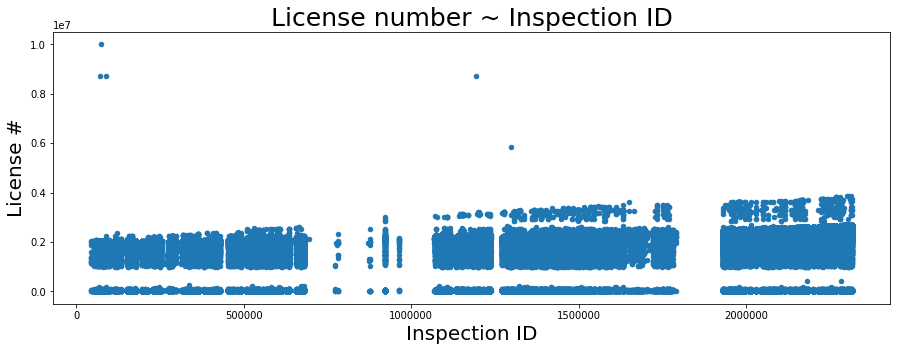

In [21]:
plt.rcParams["figure.figsize"]= [15, 5]
df.plot.scatter(x= "Inspection ID", y= "License #");
plt.title("License number ~ Inspection ID", size= 25);
plt.xlabel("Inspection ID", size= 20);
plt.ylabel("License #", size= 20);

The scatter plot indicates some level of correlation between **Inspection ID** and **License #**.
Therefore, we decided to use that correlation to fill in empty values with the ones with the closest Inspection ID.
<mark>NOT SURE ABOUT THIS.</mark>

### <mark>Are you filling in missing **License #**s with the licenses from the closest **Inspections ID**s?

In [22]:
correlation= df['License #'].corr(df['Inspection ID'])
correlation

0.23389995232630045

### <mark>This is a low level of correlation.</mark>

In [23]:
nullLicenses= df[df["License #"].isnull()]
licenses= df[~df["License #"].isnull()]
for nullIndex in nullLicenses.index:
    ID= nullLicenses.loc[nullIndex, "Inspection ID"]
    index= abs(ID - licenses['Inspection ID']).idxmin()
    df.loc[nullIndex, "License #"]= df.loc[index, "License #"]

### <mark>If I got it right, here we are filling in the empty **License #**s with the closest number. I believe a license # is assigned sequentially, and using a loose correlation is not a strong enough argument to fill in empty **License #**s.</mark>
### <mark>What's the advantage of doing it? Were we not going to use the empty licenses as an important input per se?If we are not going to do it (because we don't want `NaN`s), I think we should simply remove those lines.</mark>

In [24]:
print(df.shape)
print(len(df["Inspection ID"].unique()))
print(len(df["License #"].unique()))
print(min(df["Inspection ID"]))
print(max(df["Inspection ID"]))

(194183, 13)
194014
37019
44247
2316065


There are 169 repeated inspections IDs.
### <mark>Does this make sense?</mark>
### <mark>Shouldn't we have an unique inspection ID for each inspection?</mark>

In [25]:
dups= df[df.duplicated()]
dups.head()

,Inspection ID,DBA Name,License #,Facility Type,Risk,Address,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude
10007,2279905,THE BURGER POINT,2458622.0,Restaurant,Risk 1 (High),1900 S STATE ST,60616.0,2019-03-22T00:00:00.000,Suspected Food Poisoning,Pass w/ Conditions,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.856494,-87.627317
10008,2279883,REMEDY AT AON CENTER,2657694.0,Restaurant,Risk 2 (Medium),200 E RANDOLPH ST,60601.0,2019-03-22T00:00:00.000,License,Pass w/ Conditions,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.884632,-87.622248
10009,2279919,TONYS PANTRY MART INC.,2129010.0,Grocery Store,Risk 1 (High),745 S KEDZIE AVE,60612.0,2019-03-22T00:00:00.000,Complaint,Pass w/ Conditions,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.871448,-87.705692
10010,2279869,CHICAGO WAFFLES,2652928.0,Restaurant,Risk 1 (High),1400 S MICHIGAN AVE,60605.0,2019-03-22T00:00:00.000,License,Not Ready,NaN,41.864002,-87.624226
10016,2279857,THE JOINERY STUDIOS,2636637.0,EVENT VENU,Risk 3 (Low),2533-37 W HOMER ST,60647.0,2019-03-22T00:00:00.000,License Re-Inspection,Pass,NaN,41.916527,-87.691167


In [26]:
print("There are %d duplicated rows in the table." % len(dups))

There are 169 duplicated rows in the table.


In [27]:
# example
idx= df.loc[df['Inspection ID'] == 2279905]
idx

,Inspection ID,DBA Name,License #,Facility Type,Risk,Address,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude
9972,2279905,THE BURGER POINT,2458622.0,Restaurant,Risk 1 (High),1900 S STATE ST,60616.0,2019-03-22T00:00:00.000,Suspected Food Poisoning,Pass w/ Conditions,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.856494,-87.627317
10007,2279905,THE BURGER POINT,2458622.0,Restaurant,Risk 1 (High),1900 S STATE ST,60616.0,2019-03-22T00:00:00.000,Suspected Food Poisoning,Pass w/ Conditions,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.856494,-87.627317


### <mark>I think we should remove those duplicates:</mark>

In [28]:
df= df.drop_duplicates()
df.shape

(194014, 13)

In [29]:
print(df.shape)
print(len(df["Inspection ID"].unique()))
print(len(df["License #"].unique()))

(194014, 13)
194014
37019


[TOC](#toc)

<div id= 'risk'/>

#### 3.3.2 Risk

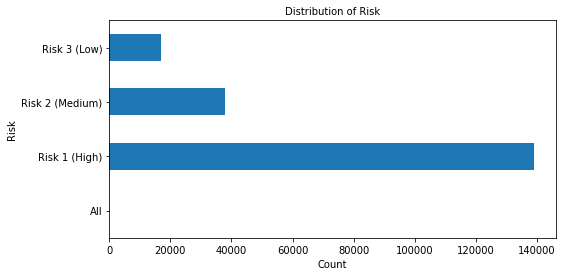

In [30]:
plt.rcParams["figure.figsize"]= [8, 4]
df.groupby("Risk")["Inspection ID"].count().plot.barh();
plt.title("Distribution of Risk", size= 10);
plt.xlabel("Count", size= 10);
plt.ylabel("Risk", size= 10);

We performed central imputation on **Risk**.

Two factors back up this decision.
Firstly, if a missing value means that no risk assessment has been done, then gathering more information (by performing an inspection) would be a good idea.
Secondly, in lack of information, an increase in risk would be recomended, so to protect the consumers.

Therefore, we decided to fill in the missing values with the most common value of **Risk**.

In [31]:
mm= df.loc[:, "Risk"].mode().iloc[0]
df.loc[:, "Risk"]= df.loc[:, "Risk"].fillna(mm)

In [29]:
df.isnull().any()

Inspection ID      False
DBA Name           False
License #          False
Facility Type       True
Risk               False
Address            False
Zip                 True
Inspection Date    False
Inspection Type     True
Results            False
Violations          True
Latitude            True
Longitude           True
dtype: bool

[TOC](#toc)

<div id= 'violations'/>

#### 3.3.3 Violations

The main goal of the project is to predict the result of an inspection before it happens.
However, violations are only known after inspections have taken place.
For a given establishment, it would make sence to move the violations to the next inspection on that establishment.
That way, we would know the violations from the previous inspection.

The licence uniquely identifies the establishment, however there are missing values, so it cannot be used. <mark>Haven't we just filled in all **License #**s?</mark> 
As such we will assume that inspections with the same name and address are the same establishment.
### <mark>I think we should keep this and remove the part where we filled in the empty **License #**s</mark>

In [30]:
df.Violations= df.groupby(['DBA Name', "Address"]).Violations.shift(1)

We then handled **Violations**'s missing values.

As a missing value either means that no violations were found or that there is no information of previous violations, we filled in missing values with the empty string, "".

In [31]:
df.Violations= df.Violations.fillna("")

As previously mentioned, for all other missing values the corresponding rows were removed.

In [32]:
# number of rows in the table
print("Number of rows in the table: %d." % len(df.index))
# number of rows with missing values
print("Number of rows with missing values: %d." % df.isnull().any(axis= 1).sum())
# percentage of rows with missing values
print("Percentage of rows with missing values: %d%%." % (df.isnull().any(axis= 1).sum() / len(df.index) * 100))

Number of rows in the table: 194014.
Number of rows with missing values: 5268.
Percentage of rows with missing values: 2%.


We decided to remove the 2% of rows containing `NaN` values.
Since we already removed columns with only `NaN` values, we used the `dropna` method to remove all lines containing `NaN` values.

In [33]:
df= df.dropna()

Now lets double check that there are no longer missing values.

In [34]:
## NOT NECESSARY, JUST FOR DOUBLE CHECKING
print("Number of rows in the table: %d." % len(df.index))
print("Number of rows with missing values: %d." % df.isnull().any(axis= 1).sum())
print("Percentage of rows with missing values: %d%%." % (df.isnull().any(axis= 1).sum() / len(df.index) * 100))

Number of rows in the table: 188746.
Number of rows with missing values: 0.
Percentage of rows with missing values: 0%.


In [35]:
len(df['DBA Name'].unique())

23797

It was impossible to check all the 23828 entries for typos or repeated rows within the timeframe of the project.
So, we decide to leave it as it was.

[TOC](#toc)

<div id= 'string-methods'/>

### 3.4 Using string methods to clean features

[TOC](#toc)

<div id= 'dates'/>

#### 3.4.1 Cleaning dates

We removed the time stamp from the **Inspection Date** feature, because it is always equal to 'T00:00:00' and unnecessary.

In [36]:
df['Inspection Date'].head()

0    2019-10-18T00:00:00.000
1    2019-10-18T00:00:00.000
2    2019-10-18T00:00:00.000
3    2019-10-18T00:00:00.000
4    2019-10-18T00:00:00.000
Name: Inspection Date, dtype: object

In [37]:
df["Inspection Date"] = pd.to_datetime(df["Inspection Date"])

[TOC](#toc)

<div id= 'time-delta'/>

#### 3.4.2 Creating time delta

An important metric is the time since last inspection.
We added it to the column.

In [38]:
df["Time Delta"]= df.groupby(['DBA Name', "Address"])["Inspection Date"].diff(periods= -1)

For "Time Delta" there will be missing values if there is no data of previous inspections on the same establishment.
In those cases the value of 0 is chosen to indicate no previous inspection.

In [39]:
df["Time Delta"] = df["Time Delta"].fillna(pd.Timedelta(seconds=0))

[TOC](#toc)

<div id= 'address' />

#### 3.4.3 Simplify **Address** feature

Although the address is needed to identify the establishments, it is otherwise not very informative.
As such, we obtained from all addresses the streets where the facilities are located and then remove them.

In [40]:
df["Address"]

0                    6800 N SHERIDAN RD 
1                        108 N STATE ST 
2                      2512 W NORTH AVE 
3                       1000 W 103RD ST 
4                  3724 W FULLERTON AVE 
5               8501-8503 S ASHLAND AVE 
6                    2235 N WESTERN AVE 
7                     2657 N KEDZIE AVE 
8             2352-2358 N MILWAUKEE AVE 
9                       7003 N CLARK ST 
10                   3456 S WESTERN AVE 
11              5443 - 5451 W NORTH AVE 
12                       3742 W 63RD ST 
13                 1949 N HUMBOLDT BLVD 
14              2820 N NARRAGANSETT AVE 
15                    4437 S CICERO AVE 
16                   3456 S WESTERN AVE 
17                    3049 N CICERO AVE 
18                    11601 W TOUHY AVE 
19                     3465 S MORGAN ST 
20                   3145 S ASHLAND AVE 
21                      4832 N BROADWAY 
22                  4014 W ARMITAGE AVE 
23                    2839 S PULASKI RD 
24              

By analysing the values of **Address**, we realised that the first two words are usualy the door number and the direction, while the last word is the indication of road, aveneue, _etc_.
So we removed those three words.
Since the process is not very accurate, we removed any names with length less than 10, as those were probably processed poorly.

In [41]:
# converting to string series
df["Address"]= df["Address"].astype(str)
df["Address"]= df["Address"].map(lambda addr: addr.title())

In [42]:
x= df.Address.str.split(" ")
df= df.drop(columns=["Address"])
for y in x:
    while '' in y: y.remove('')
    del y[-1:]
    del y[:2]
x= x[x.str.len() > 0]
x= x.apply(''.join)
df["Street"]= x
df= df.groupby("Street").filter(lambda x : len(x) > 10)
print(len(df.Street.unique()))
df.Street

714


0             Sheridan
1                State
2                North
3                103Rd
4            Fullerton
5              Ashland
6              Western
7               Kedzie
8            Milwaukee
9                Clark
10             Western
11          5451WNorth
12                63Rd
13            Humboldt
14        Narragansett
15              Cicero
16             Western
17              Cicero
18               Touhy
19              Morgan
20             Ashland
22            Armitage
23             Pulaski
24               Touhy
25             Lincoln
26           Fullerton
27              Cermak
28             Lincoln
29             Belmont
30              Oakley
              ...     
194579           103Rd
194582         Western
194583       Riverwalk
194584      Monticello
194586            31St
194588       Kingsbury
194589       Milwaukee
194590        Dearborn
194591           Touhy
194592        Armitage
194593          Harlem
194594            75Th
194595     

We can see that the number of unique roads and most of the values obtained are reasonable.

[TOC](#toc)

<div id= 'inspection-type' />

#### 3.4.4 Simplify **Inspection Type** feature

An inspection can be one of the following types:

- **canvass**: the most common type of inspection, performed at a frequency relative to the risk of the establishment;
- **complaint**: when the inspection is done in response to a complaint against the establishment;
- **consultation**: when the inspection is done at the request of the owner prior to the opening of the establishment;
- **license**: when the inspection is done as a requirement for the establishment to receive its license to operate;
- **suspected food poisoning**: when the inspection is done in response to one or more persons claiming to have gotten ill as a result of eating at the establishment (a specific type of complaint-based inspection);
- **task-force inspection**: when an inspection of a bar or tavern is done.

**Re-inspections** can occur for most types of these inspections and are indicated as such.

Several inspections contained additional descriptions.
They were removed and opted to keep only the main inspection type and its associated re-inspection in case it existed.
For instance, **canvass** and **canvass re-inspection**, **suspect food poisoning** and **suspect food poisoning re-inspection**, *etc*.

In [43]:
# converting to string series
df["Inspection Type"]= df["Inspection Type"].astype(str)
df["Inspection Type"]= df["Inspection Type"].map(lambda words: words.lower())
df.head()

,Inspection ID,DBA Name,License #,Facility Type,Risk,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Time Delta,Street
0,2316058,CHICAGO TAICHI BUBBLE TEA,2694548.0,Restaurant,Risk 1 (High),60626.0,2019-10-18,license re-inspection,Pass,,42.005587,-87.661077,3 days,Sheridan
1,2316065,Krispy Kreme Doughnuts,2689327.0,Restaurant,Risk 2 (Medium),60602.0,2019-10-18,license,Pass,,41.883423,-87.628022,9 days,State
2,2316054,SUBWAY,2590201.0,Restaurant,Risk 1 (High),60647.0,2019-10-18,complaint re-inspection,Pass,,41.910399,-87.690207,2 days,North
3,2316057,LITTLE GENIUS COMMUNITY DAYCARE 11,2359451.0,Daycare (2 - 6 Years),Risk 1 (High),60643.0,2019-10-18,license,Pass,,41.706982,-87.647758,358 days,103Rd
4,2316063,PAN ARTESANAL,2602146.0,Bakery,Risk 1 (High),60647.0,2019-10-18,complaint re-inspection,Pass w/ Conditions,,41.924670,-87.720445,7 days,Fullerton


In [44]:
pd.Series(df['Inspection Type'].unique()).sort_values()

37                   1315 license reinspection
36                                    addendum
79                        business not located
41                                      canvas
3                                      canvass
80                        canvass for rib fest
49           canvass re inspection of close up
6                        canvass re-inspection
30                canvass school/special event
29                      canvass special events
63                       canvass/special event
62                          changed court date
68                          citation re-issued
56                                        citf
72             close-up/complaint reinspection
4                                    complaint
2                      complaint re-inspection
19                              complaint-fire
18                complaint-fire re-inspection
11                                consultation
22                           corrective action
64           

[TOC](#toc)

<div id= 're-inspections' />

##### 3.4.4.1 Re-inspections

In [45]:
pd.Series(df['Inspection Type'][['inspection' in x for x in df['Inspection Type']]].unique()).sort_values()

7                    1315 license reinspection
10           canvass re inspection of close up
2                        canvass re-inspection
11             close-up/complaint reinspection
1                      complaint re-inspection
6                 complaint-fire re-inspection
12    finish complaint inspection from 5-18-10
0                        license re-inspection
9       license renewal inspection for daycare
5                               non-inspection
16                   re-inspection of close-up
13                           recall inspection
3                            recent inspection
15                                reinspection
14              reinspection of 48 hour notice
4       suspected food poisoning re-inspection
8            task force liquor inspection 1474
dtype: object

In [46]:
df['Inspection Type']= df['Inspection Type'].replace('1315 license reinspection', "license re-inspection")
df['Inspection Type']= df['Inspection Type'].replace('reinspection', "re-inspection", regex= True)
pd.Series(df['Inspection Type'][['inspection' in x for x in df['Inspection Type']]].unique()).sort_values()

9            canvass re inspection of close up
2                        canvass re-inspection
10            close-up/complaint re-inspection
1                      complaint re-inspection
6                 complaint-fire re-inspection
11    finish complaint inspection from 5-18-10
0                        license re-inspection
8       license renewal inspection for daycare
5                               non-inspection
14                               re-inspection
13             re-inspection of 48 hour notice
15                   re-inspection of close-up
12                           recall inspection
3                            recent inspection
4       suspected food poisoning re-inspection
7            task force liquor inspection 1474
dtype: object

[TOC](#toc)

<div id= 'canvass' />

##### 3.4.4.2 Canvass

In [47]:
pd.Series(df['Inspection Type'][['canvass' in x for x in df['Inspection Type']]].unique()).sort_values()

0                              canvass
6                 canvass for rib fest
4    canvass re inspection of close up
1                canvass re-inspection
3         canvass school/special event
2               canvass special events
5                canvass/special event
dtype: object

In [48]:
df['Inspection Type']= df['Inspection Type'].replace('canvas', "canvass")

In [49]:
df['Inspection Type']= df['Inspection Type'].replace(
    ['canvass for rib fest',
     'canvass school/special event',
     'canvass special events',
     'canvass/special event'
    ],
    "canvass", regex= True
)

df['Inspection Type']= df['Inspection Type'].replace(
    ['complaint-fire re-inspection',
     'canvass re inspection of close up', 
     'complaint re-inspection',
     'close-up/canvass re-inspection'
    ],
    "canvass re-inspection", regex= True
)

pd.Series(df['Inspection Type'][['canvass' in x for x in df['Inspection Type']]].unique()).sort_values()

1                  canvass
0    canvass re-inspection
dtype: object

[TOC](#toc)

<div id= 'complaints' />

##### 3.4.4.3 Complaints

In [50]:
pd.Series(df['Inspection Type'][['complaint' in word for word in df['Inspection Type']]].unique()).sort_values()

0                                   complaint
3                              complaint-fire
8    finish complaint inspection from 5-18-10
2                              fire complaint
7                   no entry-short complaint)
5                               sfp/complaint
1                        short form complaint
4                   short form fire-complaint
6                           smoking complaint
dtype: object

In [51]:
df['Inspection Type']= df['Inspection Type'].replace(
    ['complaint-fire',
     r'sfp\/complaint',
     'short form complaint',
     'short form fire-complaint',
     'smoking complaint',
     'finish complaint inspection from 5-18-10',
     'fire complaint'
    ],
    "complaint", regex= True
)

#required because of the ")" in the end
df['Inspection Type']= df['Inspection Type'].replace(["no entry-short complaint)"],"complaint")

df['Inspection Type']= df['Inspection Type'].replace(
    ['complaint-fire re-inspection',
    'close-up/complaint re-inspection'
    ], "complaint re-inspection", regex= True
)

pd.Series(df['Inspection Type'][['complaint' in word for word in df['Inspection Type']]].unique()).sort_values()

0    complaint
dtype: object

[TOC](#toc)

<div id= 'consultations' />

##### 3.4.4.4 Consultations

In [52]:
pd.Series(df['Inspection Type'][['consultation' in words for words in df['Inspection Type']]].unique()).sort_values()

0                consultation
1    pre-license consultation
dtype: object

In [53]:
df['Inspection Type']= df['Inspection Type'].replace('pre-license consultation', "consultation")

pd.Series(df['Inspection Type'][['consultation' in words for words in df['Inspection Type']]].unique()).sort_values()

0    consultation
dtype: object

[TOC](#toc)

<div id= 'licenses' />

##### 3.4.4.5 Licenses

In [54]:
pd.Series(df['Inspection Type'][['license' in words for words in df['Inspection Type']]].unique()).sort_values()

13                     day care license renewal
1                                       license
3                     license canceled by owner
11                         license daycare 1586
0                         license re-inspection
6                   license renewal for daycare
5        license renewal inspection for daycare
7                               license request
4                             license task 1474
9      license task force / not -for-profit clu
8     license task force / not -for-profit club
12                        license wrong address
2                            license-task force
10                            license/not ready
dtype: object

In [55]:
df['Inspection Type']= df['Inspection Type'].replace(
    [
        'day care license renewal',
        'license daycare 1586',
        'license renewal for daycare',
        'license renewal inspection for daycare',
        'license-task force',
        'license canceled by owner',
        'license request',
        'license task 1474',
        'license task force / not -for-profit clu',
        'license task force / not -for-profit club',
        'license wrong address',
        'license/not ready',
        'licenseb'
    ],
    "license", regex= True
)

pd.Series(df['Inspection Type'][['license' in words for words in df['Inspection Type']]].unique()).sort_values()

1                  license
0    license re-inspection
dtype: object

[TOC](#toc)

<div id= 'food-poisoning' />

##### 3.4.4.6 Suspected food poisoning

In [56]:
pd.Series(df['Inspection Type'][['food poisoning' in words for words in df['Inspection Type']]].unique()).sort_values()

1                  suspected food poisoning
0    suspected food poisoning re-inspection
dtype: object

All entries were already in accordance with the standard, so no data reduction was needed.

[TOC](#toc)

<div id= 'task-force' />

##### 3.4.4.7 Task-force inspections

In [57]:
pd.Series(df['Inspection Type'][['task force' in words for words in df['Inspection Type']]].unique()).sort_values()

10          liqour task force not ready
7                    special task force
8                            task force
9              task force liquor (1481)
1                task force liquor 1470
12               task force liquor 1474
0                task force liquor 1475
3            task force liquor catering
2     task force liquor inspection 1474
4                      task force night
11                 task force not ready
13        task force package goods 1474
6             task force package liquor
5        task force(1470) liquor tavern
dtype: object

In [58]:
df['Inspection Type']= df['Inspection Type'].replace(
    [
        'special task force',
        'task force',
        'task force liquor 1474',
        'task force liquor 1475',
        'task force night',
        'liqour task force not ready',
        'task force liquor (1481)',
        'task force liquor 1470',
        'task force liquor catering',
        'task force liquor inspection 1474',
        'task force not ready',
        'task force package goods 1474',
        'task force package liquor',
        'task force(1470) liquor tavern'
    ],
    "task-force"
)

In [59]:
pd.Series(df['Inspection Type'][['task-force' in words for words in df['Inspection Type']]].unique()).sort_values()

0    task-force
dtype: object

No re-inspections were reported by the task-forces.

[TOC](#toc)

<div id= 'additional-cleaning' />

##### 3.4.4.8 Additional cleaning

Additional cleaning was performed on the **Inspection Type** feature upon printing its unique values again.
Non-standard keys were reorganised as follows:

- *citf*: **other**
- *expansion*: **other**
- *fire/complain*: **complaint**
- *illegal operation*: **other**
- *kids cafe*: **task-force**
- *liquor catering*: **task-force**
- *non-inspection*: **other**
- *package liquor 1474*: **task-force**
- *possible fbi*: **other**
- *re-inspection of 48 hour notice*: **re-inspection**
- *re-inspection of close-up*: **re-inspection**
- *recent inspection*: **re-inspection**
- *sfp*: **other**
- *special events (festivals)*: **other**
- *tag removal*: **other**
- *taskforce*: **task-force**
- *tavern 1470*: **task-force**
- *two people ate and got sick*: **suspected food poisoning**
- *addendum*: **other**
- *business not located*: **other**
- *changed court date*: **other**
- *citation re-issued*: **other**
- *consultation*: **other**
- *corrective action*: **other**
- *duplicated*: **other**
- *error save*: **other**
- *fire*: **other**
- *haccp questionaire*: **other**
- *kitchen closed for renovation*: **other**
- *not ready*: **other**
- *other recently inspected*: **other**
- *out of business*: **other**
- *out ofbusiness*: **other**
- *recall inspection*: **re-inspection**
- *sample collection*: **other**
- *summer feeding*: **other**
- *taste of chicago*: **complaint**

In [60]:
pd.Series(df['Inspection Type'].unique()).sort_values()

23                                  addendum
42                      business not located
3                                    canvass
2                      canvass re-inspection
31                        changed court date
34                        citation re-issued
28                                      citf
4                                  complaint
9                               consultation
15                         corrective action
38                                duplicated
30                                error save
11                                      fire
37                        haccp questionaire
17                         illegal operation
29                                 kids cafe
14             kitchen closed for renovation
1                                    license
0                      license re-inspection
32                           liquor catering
21                                  no entry
10                            non-inspection
8         

In [61]:
df['Inspection Type']= df['Inspection Type'].replace(
    [
        'citf',
        'expansion',
        'illegal operation',
        'non-inspection',
        'possible fbi',
        'sfp',
        'special events \(festivals\)',
        'tag removal',
        'no entry',
        'addendum',
        'business not located',
        'changed court date',
        'citation re-issued',
        'consultation',
        'corrective action',
        'duplicated',
        'error save',
        'fire',
        'haccp questionaire',
        'kitchen closed for renovation',
        'not ready',
        'other recently inspected',
        'out of business',
        'out ofbusiness',
        'sample collection',
        'summer feeding'
    ],
    "other", regex= True
)

In [62]:
df['Inspection Type']= df['Inspection Type'].replace(
    [
        'kids cafe',
        'liquor catering',
        'package liquor 1474',
        'taskforce',
        'tavern 1470'
    ],
    "task-force", regex= True
)

In [63]:
df['Inspection Type']= df['Inspection Type'].replace(
    [
        're-inspection of 48 hour notice',
        're-inspection of close-up',
        'recent inspection',
        'recall inspection'
    ],
    "re-inspection", regex= True
)

In [64]:
df['Inspection Type']= df['Inspection Type'].replace(
    [
        'two people ate and got sick',
        'suspected food poisoning.'
    ],
    "suspected food poisoning", regex= True
)

In [65]:
df['Inspection Type']= df['Inspection Type'].replace("suspected food poisoningre-inspection", "suspected food poisoning re-inspection")

In [66]:
df['Inspection Type']= df['Inspection Type'].replace(['fire/complain','taste of chicago'], "complaint", regex= True)

Final form of the **Inspection Type** feature:

In [67]:
pd.Series(df['Inspection Type'].unique()).sort_values()

3                                   canvass
2                     canvass re-inspection
4                                 complaint
1                                   license
0                     license re-inspection
8                                     other
5                             re-inspection
7                  suspected food poisoning
6    suspected food poisoning re-inspection
9                                task-force
dtype: object

[TOC](#toc)

<div id= 'results' />

#### 3.4.5 Simplify **Results** feature

There are three possible results for an inspection:

- **pass**
- **pass with conditions**
- **fail**

Any other results will be disregarded as they are not usefull for our goal.

Establishments receiving a "pass" were found to have no critical or serious violations (see section [Simplify **Violations** feature](#violations) for further details).
Establishments receiving a "pass with conditions" were found to have critical or serious violations, but these were corrected during the inspection.
Establishments receiving a "fail" were found to have critical or serious violations that were not correctable during the inspection.
An establishment receiving a "fail" does not necessarily mean the establishment’s licensed is suspended.
Establishments found to be "out of business" or "not located" are indicated as such.

We started by making all strings lower case.
Then, we reorganised non-standard records, as follows:

- *not ready*: **fail**

In [68]:
# converting to string series
df["Results"]= df["Results"].astype(str)
df["Results"]= df['Results'].map(lambda words: words.lower())

In [69]:
pd.Series(df["Results"].unique()).sort_values()

6    business not located
2                    fail
4                no entry
5               not ready
3         out of business
0                    pass
1      pass w/ conditions
dtype: object

In [70]:
df["Results"]= df["Results"].replace('not ready', "fail", regex= True)

In [71]:
df = df[np.logical_or(df["Results"] == 'pass',np.logical_or(df["Results"] == 'fail',df["Results"] == 'pass w/ conditions'))]

In [72]:
pd.Series(df["Results"].unique())

0                  pass
1    pass w/ conditions
2                  fail
dtype: object

[TOC](#toc)

<div id= 'simp-violations' />

#### 3.4.6 Simplify **Violations** feature

An establishment can receive one or more of 45 distinct violations (violation numbers 1-44 and 70).
The violations can be *critical*, *serious* or *minor*.
They are classified by numbers, as follows:

- **Critical**: violations number 1-14
- **Serious**: violations number 15-29
- **Minor**: violations number 30-44, 70

An establishment can have more than one violation.
Each of them is separated by a "pipe" followed by a space on both sides (" | ") in the description.
Due to the change in legislation in 2018, the violation classifications did not match the description provided by Kaggle nor the table published in the [official website of the city of Chicago](https://webapps1.chicago.gov/healthinspection/Code_Violations.jsp).

For each violation number listed for a given establishment, the requirement the establishment must meet in order for it to NOT receive a violation is
noted, followed by a specific description of the findings that caused the violation to be issued.
This information is vital for future re-inspections and give important hints for the model in trying to guess if an establisment will pass or fail in a future inspection.
Therefore, we decided to keep the code of the violations in the **Violations** feature and to create an extra column with the extra information provided during the inspection (<mark>still to be done</mark>).

In [73]:
pd.set_option('display.max_colwidth', 100)

In [74]:
# converting to string series
df["Violations"]= df["Violations"].astype(str)

In [75]:
pd.Series(df["Violations"][df["Results"] == 'pass'].unique()).sort_values().head()

0                                                                                                          
8682    1. PERSON IN CHARGE PRESENT, DEMONSTRATES KNOWLEDGE, AND PERFORMS DUTIES - Comments:  PERSON IN ...
284     1. PERSON IN CHARGE PRESENT, DEMONSTRATES KNOWLEDGE, AND PERFORMS DUTIES - Comments:  PERSON IN ...
6760    1. PERSON IN CHARGE PRESENT, DEMONSTRATES KNOWLEDGE, AND PERFORMS DUTIES - Comments:  PERSON IN ...
8139    1. PERSON IN CHARGE PRESENT, DEMONSTRATES KNOWLEDGE, AND PERFORMS DUTIES - Comments:  PIC DIDNT ...
dtype: object

In [76]:
pd.Series(df["Violations"][df["Results"] == 'pass w/ conditions'].unique()).sort_values().head()

0                                                                                                          
1833    1. PERSON IN CHARGE PRESENT, DEMONSTRATES KNOWLEDGE, AND PERFORMS DUTIES - Comments: \tPERSON IN...
2544    1. PERSON IN CHARGE PRESENT, DEMONSTRATES KNOWLEDGE, AND PERFORMS DUTIES - Comments:  NO CITY SA...
137     1. PERSON IN CHARGE PRESENT, DEMONSTRATES KNOWLEDGE, AND PERFORMS DUTIES - Comments:  PERSON IN ...
1248    1. PERSON IN CHARGE PRESENT, DEMONSTRATES KNOWLEDGE, AND PERFORMS DUTIES - Comments:  PERSON IN ...
dtype: object

In [77]:
pd.Series(df["Violations"][df["Results"] == 'fail'].unique()).sort_values().head()

0                                                                                                          
2423                               1. PERSON IN CHARGE PRESENT, DEMONSTRATES KNOWLEDGE, AND PERFORMS DUTIES
3018    1. PERSON IN CHARGE PRESENT, DEMONSTRATES KNOWLEDGE, AND PERFORMS DUTIES - Comments:  2-101.11 O...
689     1. PERSON IN CHARGE PRESENT, DEMONSTRATES KNOWLEDGE, AND PERFORMS DUTIES - Comments:  2-101.11 P...
670     1. PERSON IN CHARGE PRESENT, DEMONSTRATES KNOWLEDGE, AND PERFORMS DUTIES - Comments:  2-101.11 P...
dtype: object

Unfortunately, the amount of data is too large to clean all the instances in this feature within the available timeframe for this project.
The following tasks were carried out:

- Identification of each violation number in every instance;
- Extraction of the "violation short description" keys;
- Creation of a table with all violation numbers, short descriptions and types;

[TOC](#toc)

<div id= 'violations-id' />

##### 3.4.6.1 Identification of all violations reported

By printing the violations for all possible results, we realised that the violations reported in the data set do not match the guidelines from the "Food Protection Division - Food Inspection Reporting System" of the city of Chicago, nor are in accordance to the information accompanying the data set.
This is due to the law in force since 2018.
The number of violations increased from 45 to 64, and the "violation short description" keys differ from the ones present in the official table of the [afforementioned website](#https://webapps1.chicago.gov/healthinspection/Code_Violations.jsp#critical).

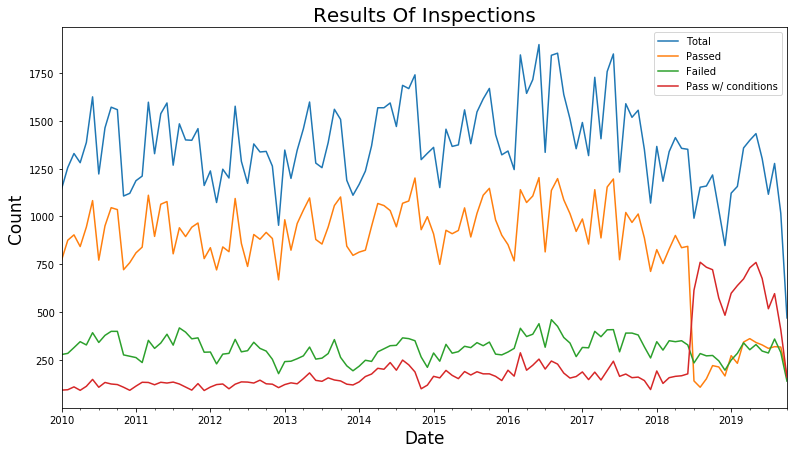

In [78]:
plt.rcParams["figure.figsize"]= [13, 7]
dfIndexed= df.set_index("Inspection Date")
dfIndexed.groupby(pd.Grouper(freq= 'M')).Results.count().plot(label= "Total");
dfIndexed= df[df.Results == "pass"]
dfIndexed= dfIndexed.set_index("Inspection Date")
dfIndexed.groupby(pd.Grouper(freq='M')).Results.count().plot(label= "Passed");
dfIndexed= df[df.Results == "fail"]
dfIndexed= dfIndexed.set_index("Inspection Date")
dfIndexed.groupby(pd.Grouper(freq= 'M')).Results.count().plot(label= "Failed");
dfIndexed= df[np.logical_and(df.Results != "pass",df.Results != "fail")]
dfIndexed= dfIndexed.set_index("Inspection Date")
dfIndexed.groupby(pd.Grouper(freq= 'M')).Results.count().plot(label= "Pass w/ conditions");
plt.legend();
plt.title("Results Of Inspections", size= 20);
plt.xlabel("Date", size= 17);
plt.ylabel("Count", size= 17);

The afforementioned change in rules can be spotted by the large change in the **Passed** and **Pass w/ conditions** counts.

For the sake of simplicity and time, we kept the original violation types ("critical", "serious" and "minor"), and the violations numbers 45 to 63 were all classified as "minor", following the description of minor violations in the official website.

Below is an example code used to identify the violation short description keys, followed by a [table](#table-violations) compiling the information for all violation numbers.

In [79]:
pd.set_option('display.max_colwidth', -1)
viol= pd.Series(df['Violations'][['| 1. ' in words for words in df["Violations"]]].unique()).sort_values().str.capitalize()
viol= viol.str.split(' 1. ').str[1]
viol= viol.str.split(' - com').str[0]
pd.Series(viol.unique())

0    person in charge present, demonstrates knowledge, and performs duties               
1    source sound condition, no spoilage, foods properly labeled, shellfish tags in place
dtype: object

<div id= 'table-violations' />

#### Summary of specific health code violations found in the data set

Violation number|Health standard to be met|Violation type
:---:|---|:---:
v1|- Person in charge present, demonstrates knowledge, and performs duties<br>- Source sound condition, no spoilage, foods properly labeled, shellfish tags in place|**Critical**
v2|- City of Chicago food service sanitation certificate<br>- Facilities to maintain proper temperature|**Critical**
v3|- Management, food employee and conditional employee; knowledge, responsibilities and reporting<br>- Potentially hazardous food meets temperature requirement during storage, preparation display and service|**Critical**
v4|- Proper use of restriction and exclusion<br>- Source of cross contamination controlled, *i.e.*, cutting boards, food  handlers, utensils, *etc.*|**Critical**
v5|- Personnel with infections restricted: no open sores, wounds, *etc.*<br>- Procedures for responding to vomiting and diarrheal events|**Critical**
v6|- Proper eating, tasting, drinking, or tobacco use<br>- Thermometers provided & accurate|**Critical**
v7|- No discharge from eyes, nose, and mouth<br>- Wash and rinse water: clean and proper temperature|**Critical**
v8|- Hands clean & properly washed<br>- Sanitizing rinse for equipment and utensils: clean, proper temperature, concentration, exposure time|**Critical**
v9|- No bare hand contact with the food or a pre-approved alternative procedure properly allowed<br>- Water source: safe, hot & cold under city pressure|**Critical**
v10|- Adequate handwashing sinks properly supplied and accessible<br>- Sewage and waste water disposal, no back siphonage, cross  connection and/or back flow|**Critical**
v11|- Adequate number, convenient, accessible, designed, and maintained<br>- Food obtained from approved source|**Critical**
v12|- Food received at proper temperature<br>- Hand washing facilities: with soap and sanitary hand drying devices, convenient and accessible to food prep area|**Critical**
v13|- Food in good condition, safe, & unadulterated<br>- No evidence of rodent or insect infestation, no birds, turtles or other animals|**Critical**
v14|- Previous serious violation corrected<br>- Required records available: shellstock tags, parasite destruction|**Critical**
v15|- Food separated and protected<br>- Unwrapped and potentially hazardous food not re-served|*Serious*
v16|- Food-contact surfaces: cleaned & sanitize<br>- Food protected during storage, preparation, display, service and transportation|*Serious*
v17|- Potentially hazardous food properly thawed<br>- Proper disposition of returned, previously served, reconditioned & unsafe food|*Serious*
v18|- No evidence of rodent or insect outer openings protected/rodent proofed, a written log shall be maintained available to the inspectors|*Serious*
v19|- Outside garbage waste grease and storage area; clean, rodent proof, all containers covered<br>- Proper reheating procedures for hot holding|*Serious*
v20|- Inside containers or receptacles: adequate number, properly covered and insect/rodent proof<br>- Proper cooling time and temperature|*Serious*
v21|- Certified food manager on site when potentially hazardous foods are  prepared and served<br>- Proper hot holding temperatures|*Serious*
v22|- Dish machines: provided with accurate thermometers, chemical test kits and suitable gauge cock<br>- Proper cold holding temperatures|*Serious*
v23|- Dishes and utensils flushed, scraped, soaked<br>- Proper date marking and disposition|*Serious*
v24|- Dish washing facilities: properly designed, constructed, maintained, installed, located and operated<br>- Time as a public health control; procedures & records|*Serious*
v25|- Consumer advisory provided for raw/undercooked food<br>- Toxic items properly stored, labeled and used|*Serious*
v26|- Adequate number, convenient, accessible, properly designed and installed<br>- Pasteurized foods used; prohibited foods not offered|*Serious*
v27|- Food additives: approved and properly used<br>- Toilet rooms enclosed clean, provided with hand cleanser, sanitary hand drying devices and proper waste receptacles|*Serious*
v28|- Inspection report summary displayed and visible to all customers<br>- Toxic substances properly identified, stored, & used|*Serious*
v29|-Compliance with variance/specialized process/haccp<br>- Previous minor violation(s) corrected|*Serious*
v30|- Food in original container, properly labeled: customer advisory posted as needed|Minor
v31|- Clean multi-use utensils and single service articles properly stored: no reuse of single service articles<br>- Water & ice from approved source|Minor
v32|- Food and non-food contact surfaces properly designed, constructed and maintained<br>- Variance obtained for specialized processing methods|Minor
v33|- Food and non-food contact equipment utensils clean, free of abrasive detergents<br>- Proper cooling methods used; adequate equipment for temperature control|Minor
v34|- Floors: constructed per code, cleaned, good repair, coving installed, dust-less cleaning methods used|Minor
v35|- Approved thawing methods used<br>- Walls, ceilings, attached equipment constructed per code: good repair, surfaces clean and dust-less cleaning methods|Minor
v36|- Lighting: required minimum foot-candles of light provided, fixtures shielded<br>- Thermometers provided & accurate|Minor
v37|- Food properly labeled; original container<br>- Toilet room doors self closing: dressing rooms with lockers provided: complete separation from living/sleeping quarters|Minor
v38|- Insects, rodents, & animals not present<br>- Ventilation: rooms and equipment vented as required: plumbing: installed and maintained|Minor
v39|- Contamination prevented during food preparation, storage & display<br>- Linen: clean and soiled properly stored|Minor
v40|- Personal cleanliness<br>- Refrigeration and metal stem thermometers provided and conspicuous|Minor
v41|- Premises maintained free of litter, unnecessary articles, cleaning equipment properly stored<br>- Wiping cloths: properly used & stored|Minor
v42|- Appropriate method of handling of food (ice) hair restraints and clean apparel worn<br>- Washing fruits & vegetables|Minor
v43|- Food (ice) dispensing utensils, wash cloths properly stored<br>- In-use utensils: properly stored|Minor
v44|- Only authorized personnel in the food-prep area<br>- Utensils, equipment & linens: properly stored, dried, & handled|Minor
v45|- Food handler requirements met<br>- Single-use/single-service articles: properly stored & used|Minor
v46|- Gloves used properly|Minor
v47|- Food & non-food contact surfaces cleanable, properly designed, constructed & used|Minor
v48|- Warewashing facilities: installed, maintained & used; test strips|Minor
v49|- Non-food/food contact surfaces clean|Minor
v50|- Hot & cold water available; adequate pressure|Minor
v51|- Plumbing installed; proper backflow devices|Minor
v52|- Sewage & waste water properly disposed|Minor
v53|- Toilet facilities: properly constructed, supplied, & cleaned|Minor
v54|- Garbage & refuse properly disposed; facilities maintained|Minor
v55|- Physical facilities installed, maintained & clean|Minor
v56|- Adequate ventilation & lighting; designated areas used|Minor
v57|- All food employees have food handler training|Minor
v58|- Allergen training as required|Minor
v59|- Previous priority foundation violation corrected|Minor
v60|- Previous core violation corrected|Minor
v61|- Summary report displayed and visible to the public|Minor
v62|- Compliance with clean indoor air ordinance|Minor
v63|- Removal of suspension sign|Minor
v70|- No smoking regulations|Minor

[TOC](#toc)

<div id= 'violations-numbers' />

##### 3.4.6.2 Extraction of violation numbers

In [80]:
violations= ["Violation" + str(viol) for viol in range(1, 64)]
violations.append("Violation70")
df= pd.concat([df, pd.DataFrame(columns= violations)], sort= False)
df= df.fillna(0)

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Passing integers to fillna is deprecated, will raise a TypeError in a future version.  To retain the old behavior, pass pd.Timedelta(seconds=n) instead.
  after removing the cwd from sys.path.


In [81]:
pd.set_option('display.max_colwidth', 100)
for index, row in df.iterrows():
    vRow = row.Violations.split(" | ")
    for viol in range(len(vRow)):
        df.at[index,"Violation"+vRow[viol].split(".")[0]] = 1 
#a Violation column is added when there are no violations
#remove it
df = df.drop(columns=["Violation"],axis=1)

In [82]:
df= df.drop(columns= ["Violations"], axis= 1)

[TOC](#toc)

<div id= 'risk-cleaning' />

#### 3.4.7 Clean risk feature

**Risk** is an ordinal feature, with *low* being the minimum and *high* being the maximum.
We assigned it values from 1 to 3. We also have the value *All*. We assign it the same value as *high*.

In [83]:
df = df.replace("Risk 3 (Low)",1)
df = df.replace("Risk 2 (Medium)",2)
df = df.replace("Risk 1 (High)",3)
df = df.replace("All",3)
df.head()

,Inspection ID,DBA Name,License #,Facility Type,Risk,Zip,Inspection Date,Inspection Type,Results,Latitude,...,Violation55,Violation56,Violation57,Violation58,Violation59,Violation60,Violation61,Violation62,Violation63,Violation70
0,2316058.0,CHICAGO TAICHI BUBBLE TEA,2694548.0,Restaurant,3,60626.0,2019-10-18,license re-inspection,pass,42.005587,...,0,0,0,0,0,0,0,0,0,0
1,2316065.0,Krispy Kreme Doughnuts,2689327.0,Restaurant,2,60602.0,2019-10-18,license,pass,41.883423,...,0,0,0,0,0,0,0,0,0,0
2,2316054.0,SUBWAY,2590201.0,Restaurant,3,60647.0,2019-10-18,canvass re-inspection,pass,41.910399,...,0,0,0,0,0,0,0,0,0,0
3,2316057.0,LITTLE GENIUS COMMUNITY DAYCARE 11,2359451.0,Daycare (2 - 6 Years),3,60643.0,2019-10-18,license,pass,41.706982,...,0,0,0,0,0,0,0,0,0,0
4,2316063.0,PAN ARTESANAL,2602146.0,Bakery,3,60647.0,2019-10-18,canvass re-inspection,pass w/ conditions,41.924670,...,0,0,0,0,0,0,0,0,0,0


[TOC](#toc)

<div id= 'maps' />

## 4 Approximate geographical position of food establishments

As we have the latitude and longitude we can do a scatter plot of the values and overlay them with a map of chicago.
Due to the curvature of earth we would expect some distortion, however in such a small area it is negligable.

In [84]:
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

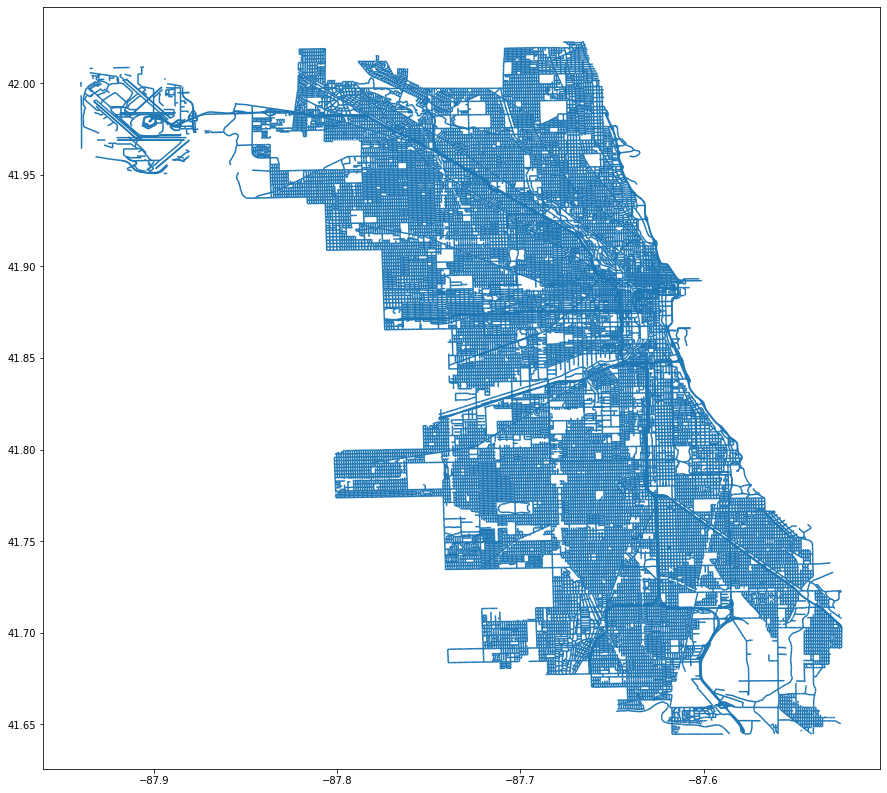

In [85]:
chicagomap= gpd.read_file('chicago-street-lines.shp')
fig, ax = plt.subplots(figsize= (15, 15))
chicagomap.plot(ax= ax);

In [86]:
crs= {'init': 'epsg:4326'}
# maybe we can skip this step if we keep the **Location** feature
Geometry= [Point(xy) for xy in zip(df["Longitude"], df["Latitude"])]
Geometry[:3]

In [87]:
geodf= gpd.GeoDataFrame(df, crs= crs, geometry= Geometry)
geodf.head()

,Inspection ID,DBA Name,License #,Facility Type,Risk,Zip,Inspection Date,Inspection Type,Results,Latitude,...,Violation56,Violation57,Violation58,Violation59,Violation60,Violation61,Violation62,Violation63,Violation70,geometry
0,2316058.0,CHICAGO TAICHI BUBBLE TEA,2694548.0,Restaurant,3,60626.0,2019-10-18,license re-inspection,pass,42.005587,...,0,0,0,0,0,0,0,0,0,POINT (-87.66108 42.00559)
1,2316065.0,Krispy Kreme Doughnuts,2689327.0,Restaurant,2,60602.0,2019-10-18,license,pass,41.883423,...,0,0,0,0,0,0,0,0,0,POINT (-87.62802 41.88342)
2,2316054.0,SUBWAY,2590201.0,Restaurant,3,60647.0,2019-10-18,canvass re-inspection,pass,41.910399,...,0,0,0,0,0,0,0,0,0,POINT (-87.69021 41.91040)
3,2316057.0,LITTLE GENIUS COMMUNITY DAYCARE 11,2359451.0,Daycare (2 - 6 Years),3,60643.0,2019-10-18,license,pass,41.706982,...,0,0,0,0,0,0,0,0,0,POINT (-87.64776 41.70698)
4,2316063.0,PAN ARTESANAL,2602146.0,Bakery,3,60647.0,2019-10-18,canvass re-inspection,pass w/ conditions,41.924670,...,0,0,0,0,0,0,0,0,0,POINT (-87.72044 41.92467)


We will do the map showing the position depending on the results of the inspection. As there are a lot of values the map gets really cluttered, so we decided to split into two maps, one with the fails and another with the passes and pass with conditions.

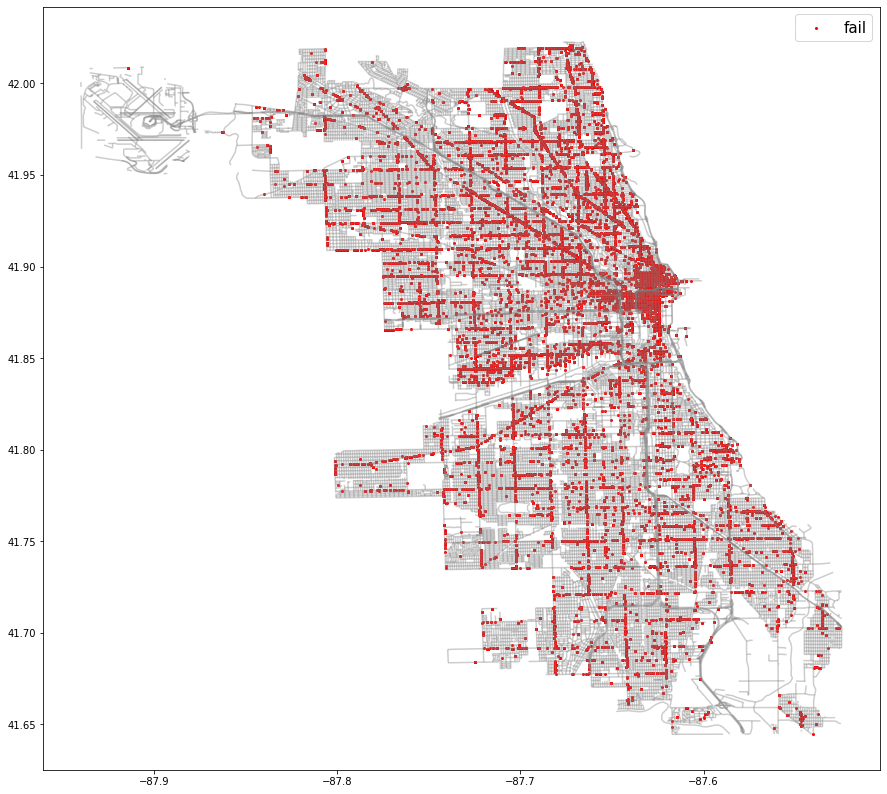

In [88]:
fig, ax= plt.subplots(figsize= (15, 15))
chicagomap.plot(ax= ax, alpha= 0.4, color= 'grey')
geodf[geodf["Results"] == 'fail'].plot(ax= ax, markersize= 16, color= 'red', marker= '.', label= 'fail')
plt.legend(prop= {'size': 15});

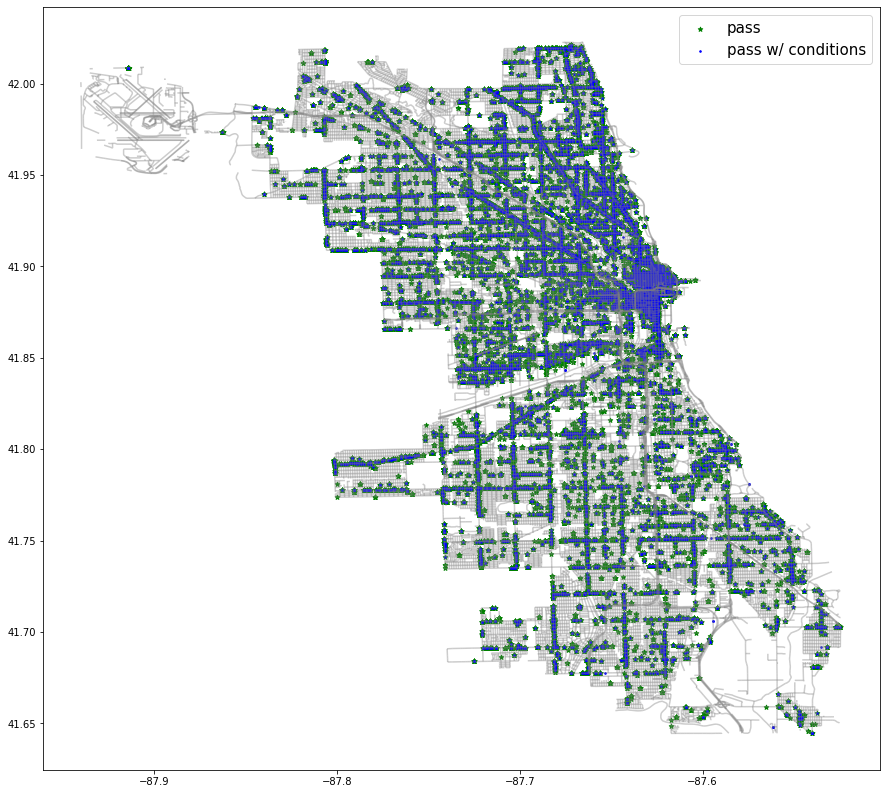

In [89]:
fig, ax= plt.subplots(figsize= (15, 15))
chicagomap.plot(ax= ax, alpha= 0.4, color= 'grey')
geodf[geodf["Results"] == 'pass'].plot(ax= ax, markersize= 22, color= 'green', marker= '*', label= 'pass')
geodf[geodf["Results"] == 'pass w/ conditions'].plot(ax= ax, markersize= 10, color= 'blue', marker= '.', label= 'pass w/ conditions')
plt.legend(prop= {'size': 15});

In [90]:
df = df.drop(columns = "geometry")

[TOC](#toc)

<div id= 'modeling' />

## 5 Modeling

Now that our data has been cleaned to make modeling easyer we must do said modeling.
Several models have been selected that will be trained and tuned to achieve maximum performance.

First we start with the simpler models and then proced to the more complex ones.
The models selected are:<br>
 Decision trees<br>
 Random forests<br>
 K nearest neighbours<br>
 Linear regression<br>
 Logistic regression<br>
 Naive bayes<br>
 Neural Networks<br>
 Ensemble of all the previous<br>

[TOC](#toc)
<div id= 'pre-processing'/>

### 5.1 Pre Processing

Before we can train our models there is some pre processing we must perfom

In [91]:
from sklearn import preprocessing

[TOC](#toc)
<div id= 'change-type' />

#### 5.1.1 Change variable types

Most algoritms dont allow us to use *datetime* types. Therefore we will change the Variables Time Delta and Inspection Date to integers.

In [92]:
#convert time delta to int to allow moedlling
df["Time Delta"] = df["Time Delta"].astype('timedelta64[D]').astype(int)
#convert date to int to allow moedlling
df["Inspection Date"] = df['Inspection Date'].dt.strftime("%Y%m%d").astype(int)

[TOC](#toc)
<div id= 'dummies' />

#### 5.1.2 Create dummie variables

Most algoritms dont allow us to use categorical(string) variables. Even those wich usually do, decision trees, random forests and Knn.
Therefore we will create dummie variables for all categorical data.

Our data is too sparce, with most categorical values having well over 100 different values. Such a sparce data makes the learning process unbearingly slow.
As such we will reduce the dummies to those thar occur more than a certain amount.

In [93]:
countsDBA = df['DBA Name'].value_counts()[lambda x: x > 100].index

dfDummiesDBA = pd.get_dummies(pd.Categorical(df['DBA Name'], categories=countsDBA))

In [94]:
countsFT = df['Facility Type'].value_counts()[lambda x: x > 100].index

dfDummiesFT = pd.get_dummies(pd.Categorical(df['Facility Type'], categories=countsFT))

In [95]:
countsFT = df['Street'].value_counts()[lambda x: x > 100].index

dfDummiesST = pd.get_dummies(pd.Categorical(df['Street'], categories=countsFT))

In [96]:
countsFT = df['Inspection Type'].value_counts()[lambda x: x > 0].index

dfDummiesIT = pd.get_dummies(pd.Categorical(df['Inspection Type'], categories=countsFT))

dfDummies = df.drop(columns = ["DBA Name","Facility Type","Inspection Type","Street"])
dfDummies = pd.concat([dfDummies,dfDummiesDBA,dfDummiesFT,dfDummiesST,dfDummiesIT],axis=1)

Due to the lack of a few rows, and as such a few indexes, the functions created a lot of rows with nan values, wich we now remove.

In [97]:
dfDummies = dfDummies.dropna()

In [98]:
dfDummies.head()

,Inspection ID,License #,Risk,Zip,Inspection Date,Results,Latitude,Longitude,Time Delta,Violation1,...,canvass,canvass re-inspection,license,complaint,license re-inspection,other,suspected food poisoning,re-inspection,task-force,suspected food poisoning re-inspection
0,2316058.0,2694548.0,3.0,60626.0,20191018.0,pass,42.005587,-87.661077,3.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2316065.0,2689327.0,2.0,60602.0,20191018.0,pass,41.883423,-87.628022,9.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2316054.0,2590201.0,3.0,60647.0,20191018.0,pass,41.910399,-87.690207,2.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2316057.0,2359451.0,3.0,60643.0,20191018.0,pass,41.706982,-87.647758,358.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2316063.0,2602146.0,3.0,60647.0,20191018.0,pass w/ conditions,41.924670,-87.720445,7.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


[TOC](#toc)
<div id= 'normalization' />

#### 5.1.3 Normalize values

Some of the models used are sensitive to scale, as is the case with Knn and linear regression.
In consequence we will normalize all variables.

In [99]:
dfX = dfDummies.drop(columns = "Results")
dfY = dfDummies["Results"]

x = dfX.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
dfX = pd.DataFrame(x_scaled)

[TOC](#toc)
<div id= 'split' />

#### 5.1.4 Train Test Validation Split

We split our data into a 60-30-10 split, that it 60% for train , 30% for testing and 10% for validation.

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

dfTrainX,dfTestX,dfTrainY,dfTestY = train_test_split(dfX,dfY,test_size = 0.4)
dfTestX,dfValidationX,dfTestY,dfValidationY = train_test_split(dfTestX,dfTestY,test_size = 0.25)

[TOC](#toc)
<div id= 'tree-modeling'/>

### 5.2 Decision Trees

In [101]:
from sklearn.tree import DecisionTreeClassifier

[TOC](#toc)
<div id= 'tree-tunning' />

#### 5.2.1 Train tree and tune hiperparameters

In [102]:
treeModel = DecisionTreeClassifier(
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_impurity_decrease=0.1**7,
    random_state=0
)
treeModel.fit(dfTrainX,dfTrainY);

In [103]:
dfTrainPredicted = treeModel.predict(dfTrainX)
dfTestPredicted = treeModel.predict(dfTestX)

print(accuracy_score(dfTrainY, dfTrainPredicted))
print(accuracy_score(dfTestY, dfTestPredicted))

1.0
0.5925860989355041


In [104]:
treeModel = DecisionTreeClassifier(
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_impurity_decrease=2*0.1**5,
    random_state=0
)
treeModel.fit(dfTrainX,dfTrainY);

dfTrainPredicted = treeModel.predict(dfTrainX)
dfTestPredicted = treeModel.predict(dfTestX)

print(accuracy_score(dfTrainY, dfTrainPredicted))
print(accuracy_score(dfTestY, dfTestPredicted))

0.8771055367005223
0.6273011897307451


In [105]:
treeModel = DecisionTreeClassifier(
    max_depth=25,
    min_samples_split=2,
    min_samples_leaf=1,
    min_impurity_decrease=2*0.1**5,
    random_state=0
)
treeModel.fit(dfTrainX,dfTrainY)

dfTrainPredicted = treeModel.predict(dfTrainX)
dfTestPredicted = treeModel.predict(dfTestX)

print(accuracy_score(dfTrainY, dfTrainPredicted))
print(accuracy_score(dfTestY, dfTestPredicted))

0.8220766697140853
0.6359924859110833


In [106]:
treeModel = DecisionTreeClassifier(
    max_depth=20,
    min_samples_split=2,
    min_samples_leaf=1,
    min_impurity_decrease=2*0.1**5,
    random_state=0
)
treeModel.fit(dfTrainX,dfTrainY)

dfTrainPredicted = treeModel.predict(dfTrainX)
dfTestPredicted = treeModel.predict(dfTestX)

print(accuracy_score(dfTrainY, dfTrainPredicted))
print(accuracy_score(dfTestY, dfTestPredicted))

0.7725081090558429
0.6512210394489668


In [107]:
treeModel = DecisionTreeClassifier(
    max_depth=20,
    min_samples_split=2,
    min_samples_leaf=20,
    min_impurity_decrease=2*0.1**5,
    random_state=0
)
treeModel.fit(dfTrainX,dfTrainY)

dfTrainPredicted = treeModel.predict(dfTrainX)
dfTestPredicted = treeModel.predict(dfTestX)

print(accuracy_score(dfTrainY, dfTrainPredicted))
print(accuracy_score(dfTestY, dfTestPredicted))

0.710566193690591
0.6671509079524107


In [108]:
treeModel = DecisionTreeClassifier(
    max_depth=20,
    min_samples_split=100,
    min_samples_leaf=20,
    min_impurity_decrease=2*0.1**5,
    random_state=0
)
treeModel.fit(dfTrainX,dfTrainY)

dfTrainPredicted = treeModel.predict(dfTrainX)
dfTestPredicted = treeModel.predict(dfTestX)

print(accuracy_score(dfTrainY, dfTrainPredicted))
print(accuracy_score(dfTestY, dfTestPredicted))

0.7010857994464552
0.672686286787727


In [109]:
treeModel = DecisionTreeClassifier(
    max_depth=20,
    min_samples_split=100,
    min_samples_leaf=20,
    min_impurity_decrease=1*0.1**4,
    random_state=0
)
treeModel.fit(dfTrainX,dfTrainY)

dfTrainPredicted = treeModel.predict(dfTrainX)
dfTestPredicted = treeModel.predict(dfTestX)
dfValidationPredicted = treeModel.predict(dfValidationX)

The model above was the best one obtained, with a test accuracy of 68.4%.
Any change tried on the paraeters made the result worse.

[TOC](#toc)
<div id= 'tree-evaluation' />

#### 5.2.2 Evaluate decision tree results

In [110]:
print(accuracy_score(dfTrainY, dfTrainPredicted))
confusion_matrix(dfTrainY,dfTrainPredicted)

0.6840286039900312


array([[ 4572, 12514,   857],
       [ 1257, 45279,  1620],
       [  901,  8081,  4768]], dtype=int64)

In [111]:
print(accuracy_score(dfTestY, dfTestPredicted))
confusion_matrix(dfTestY, dfTestPredicted)

0.6816781465247339


array([[ 2186,  6341,   380],
       [  725, 22642,   787],
       [  443,  4033,  2388]], dtype=int64)

In [112]:
print(accuracy_score(dfValidationY, dfValidationPredicted))
confusion_matrix(dfValidationY, dfValidationPredicted)

0.6869035990682997


array([[ 749, 2012,  153],
       [ 233, 7616,  281],
       [ 154, 1334,  777]], dtype=int64)

We managed to obtain an accuracy of around 68% on the train,test and validation set. This indicates that the model has not been overfit in either the training or the hiperparameters.

Given that we have 3 different classes the 68% accuracy is substancialy better that random guessing, wich would have an accuracy of 33.3%. However, given that 80% of the validation set is the class *pass*,
if the model where to allways predict pass it would have gotten a better accuracy. As such the model is not at a level wich we would consider useful.

[TOC](#toc)
<div id= 'forest-modeling'/>

### 5.3 Random Forests

In [113]:
from sklearn.ensemble import RandomForestClassifier

In [114]:
forestModel = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_impurity_decrease=0.1**7,
    random_state=0,
    n_jobs=4
)
forestModel.fit(dfTrainX,dfTrainY);

The model above was the best one obtained, with a test accuracy of 69.8%.
Any change tried on the paraeters made the result worse.

In [115]:
dfTrainPredicted = forestModel.predict(dfTrainX)
dfTestPredicted = forestModel.predict(dfTestX)
dfValidationPredicted = forestModel.predict(dfValidationX)

print(accuracy_score(dfTrainY, dfTrainPredicted))
confusion_matrix(dfTrainY,dfTrainPredicted)

0.9999373818081629


array([[17942,     1,     0],
       [    0, 48154,     2],
       [    1,     1, 13748]], dtype=int64)

In [116]:
print(accuracy_score(dfTestY, dfTestPredicted))
confusion_matrix(dfTestY,dfTestPredicted)

0.6989104571070758


array([[ 2827,  5742,   338],
       [  765, 22588,   801],
       [  438,  3937,  2489]], dtype=int64)

In [117]:
print(accuracy_score(dfValidationY, dfValidationPredicted))
confusion_matrix(dfValidationY,dfValidationPredicted)

0.7041851378766248


array([[ 958, 1834,  122],
       [ 260, 7571,  299],
       [ 144, 1278,  843]], dtype=int64)

From the large difference bettwen the train and test accuracy we know that the data is being severely overfit. However, any thange to the parameters resulted in a decrease of both the train and test accuracies. As such the best model was a severely overfit one wich will be kept.

Even though the model is overfitted and the parameters are the algoritms default we still obtained a slightly better accuracy than with the decision tree(70% vs 68%). However the same ctriticism of the results prevails.

[TOC](#toc)
<div id= 'knn-modeling'/>

### 5.4 K nearest neighbours

In [118]:
from sklearn.neighbors import NearestNeighbors

[TOC](#toc)
<div id= 'knn-pre-processing' />

#### 5.4.1 KNN pre processing

Due to the way we are using the KNN algoritm to predict the results, the indexes need to be contiguous.

In [119]:
dfKNNTrainX = dfTrainX.reset_index(drop=True)
dfKNNTrainY = dfTrainY.reset_index(drop=True)
dfKNNTestX = dfTestX.reset_index(drop=True)
dfKNNTestY = dfTestY.reset_index(drop=True)
dfKNNValidationX = dfValidationX.reset_index(drop=True)
dfKNNValidationY = dfValidationY.reset_index(drop=True)

[TOC](#toc)
<div id= 'knn-kneighbours' />

#### 5.4.2 KNN select number of neighbours

In [127]:
knnModel = NearestNeighbors(n_neighbors=5,n_jobs=4)
knnModel.fit(dfKNNTrainX)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=4, n_neighbors=5, p=2, radius=1.0)

In [128]:
neighbors = knnModel.kneighbors(dfKNNTrainX)[1]
dfKNNTrainPredicted = []
for neighbor in neighbors:
    dfKNNTrainPredicted.append(dfKNNTrainY.loc[neighbor].copy().mode()[0])
dfKNNTrainPredicted = pd.DataFrame(dfKNNTrainPredicted)

neighbors = knnModel.kneighbors(dfKNNTestX)[1]
dfKNNTestPredicted = []
for neighbor in neighbors:
    dfKNNTestPredicted.append(dfKNNTrainY.loc[neighbor].copy().mode()[0])
dfKNNTestPredicted = pd.DataFrame(dfKNNTestPredicted)

print(accuracy_score(dfKNNTrainY, dfKNNTrainPredicted))
print(accuracy_score(dfKNNTestY, dfKNNTestPredicted))

0.68267605104635
0.5505823418910457


In [129]:
knnModel = NearestNeighbors(n_neighbors=1,n_jobs=4)
knnModel.fit(dfKNNTrainX)

neighbors = knnModel.kneighbors(dfKNNTrainX)[1]
dfKNNTrainPredicted = []
for neighbor in neighbors:
    dfKNNTrainPredicted.append(dfKNNTrainY.loc[neighbor].copy().mode()[0])
dfKNNTrainPredicted = pd.DataFrame(dfKNNTrainPredicted)

neighbors = knnModel.kneighbors(dfKNNTestX)[1]
dfKNNTestPredicted = []
for neighbor in neighbors:
    dfKNNTestPredicted.append(dfKNNTrainY.loc[neighbor].copy().mode()[0])
dfKNNTestPredicted = pd.DataFrame(dfKNNTestPredicted)

print(accuracy_score(dfKNNTrainY, dfKNNTrainPredicted))
print(accuracy_score(dfKNNTestY, dfKNNTestPredicted))

1.0
0.4922479649342517


In [130]:
knnModel = NearestNeighbors(n_neighbors=15,n_jobs=4)
knnModel.fit(dfKNNTrainX)

neighbors = knnModel.kneighbors(dfKNNTrainX)[1]
dfKNNTrainPredicted = []
for neighbor in neighbors:
    dfKNNTrainPredicted.append(dfKNNTrainY.loc[neighbor].copy().mode()[0])
dfKNNTrainPredicted = pd.DataFrame(dfKNNTrainPredicted)

neighbors = knnModel.kneighbors(dfKNNTestX)[1]
dfKNNTestPredicted = []
for neighbor in neighbors:
    dfKNNTestPredicted.append(dfKNNTrainY.loc[neighbor].copy().mode()[0])
dfKNNTestPredicted = pd.DataFrame(dfKNNTestPredicted)

print(accuracy_score(dfKNNTrainY, dfKNNTrainPredicted))
print(accuracy_score(dfKNNTestY, dfKNNTestPredicted))

0.6407719570689677
0.5963180964308078


In [131]:
knnModel = NearestNeighbors(n_neighbors=30,n_jobs=4)
knnModel.fit(dfKNNTrainX)

neighbors = knnModel.kneighbors(dfKNNTrainX)[1]
dfKNNTrainPredicted = []
for neighbor in neighbors:
    dfKNNTrainPredicted.append(dfKNNTrainY.loc[neighbor].copy().mode()[0])
dfKNNTrainPredicted = pd.DataFrame(dfKNNTrainPredicted)

neighbors = knnModel.kneighbors(dfKNNTestX)[1]
dfKNNTestPredicted = []
for neighbor in neighbors:
    dfKNNTestPredicted.append(dfKNNTrainY.loc[neighbor].copy().mode()[0])
dfKNNTestPredicted = pd.DataFrame(dfKNNTestPredicted)

print(accuracy_score(dfKNNTrainY, dfKNNTrainPredicted))
print(accuracy_score(dfKNNTestY, dfKNNTestPredicted))

0.6249295545341833
0.6094176581089543


In [132]:
knnModel = NearestNeighbors(n_neighbors=50,n_jobs=4)
knnModel.fit(dfKNNTrainX)

neighbors = knnModel.kneighbors(dfKNNTrainX)[1]
dfKNNTrainPredicted = []
for neighbor in neighbors:
    dfKNNTrainPredicted.append(dfKNNTrainY.loc[neighbor].copy().mode()[0])
dfKNNTrainPredicted = pd.DataFrame(dfKNNTrainPredicted)

neighbors = knnModel.kneighbors(dfKNNTestX)[1]
dfKNNTestPredicted = []
for neighbor in neighbors:
    dfKNNTestPredicted.append(dfKNNTrainY.loc[neighbor].copy().mode()[0])
dfKNNTestPredicted = pd.DataFrame(dfKNNTestPredicted)

print(accuracy_score(dfKNNTrainY, dfKNNTrainPredicted))
print(accuracy_score(dfKNNTestY, dfKNNTestPredicted))

0.6191060626933337
0.6132498434564809


In [133]:
knnModel = NearestNeighbors(n_neighbors=100,n_jobs=4)
knnModel.fit(dfKNNTrainX)

neighbors = knnModel.kneighbors(dfKNNTrainX)[1]
dfKNNTrainPredicted = []
for neighbor in neighbors:
    dfKNNTrainPredicted.append(dfKNNTrainY.loc[neighbor].copy().mode()[0])
dfKNNTrainPredicted = pd.DataFrame(dfKNNTrainPredicted)

neighbors = knnModel.kneighbors(dfKNNTestX)[1]
dfKNNTestPredicted = []
for neighbor in neighbors:
    dfKNNTestPredicted.append(dfKNNTrainY.loc[neighbor].copy().mode()[0])
dfKNNTestPredicted = pd.DataFrame(dfKNNTestPredicted)

neighbors = knnModel.kneighbors(dfKNNValidationX)[1]
dfKNNValidationPredicted = []
for neighbor in neighbors:
    dfKNNValidationPredicted.append(dfKNNTrainY.loc[neighbor].copy().mode()[0])
dfKNNValidationPredicted = pd.DataFrame(dfKNNValidationPredicted)

Increasing the number of neighbours continuously increased the test accuracy and decreased the training accuracy. We decided to stop at 100, as at this point the changes are no longer significant.

[TOC](#toc)
<div id= 'knn-evaluation' />

#### 5.4.3 KNN evaluation

In [134]:
print(accuracy_score(dfKNNTrainY, dfKNNTrainPredicted))
confusion_matrix(dfKNNTrainY,dfKNNTrainPredicted)

0.6126313416573783


array([[  159, 17412,   372],
       [   50, 47547,   559],
       [   43, 12495,  1212]], dtype=int64)

In [135]:
print(accuracy_score(dfKNNTestY, dfKNNTestPredicted))
confusion_matrix(dfKNNTestY,dfKNNTestPredicted)

0.6127489041953663


array([[   82,  8651,   174],
       [   39, 23834,   281],
       [   17,  6299,   548]], dtype=int64)

In [136]:
print(accuracy_score(dfKNNValidationY, dfKNNValidationPredicted))
confusion_matrix(dfKNNValidationY,dfKNNValidationPredicted)

0.6180779923360132


array([[  29, 2834,   51],
       [   8, 8008,  114],
       [   4, 2072,  189]], dtype=int64)

The accuracy for the train, test and validation are very similar, indicating that neither the training nor the parameters were overfit. The results from this training, at 61.8% are worse that the ones obtained by both of the tree methods(decision trees and random forests). Also as expected from knn algorithm the time to predict the values was substatially larger than for the previous algorithms.

[TOC](#toc)
<div id= 'lr'/>

### 5.5 Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

<div id= 'lr-pre-processing' />

#### 5.5.1 Linear Regression pre processing

As linear regression is as its name indicates, a regression model, some preprocesing is required to turn our classification problem into a regression one.

In [137]:
le = preprocessing.LabelEncoder()
le.fit(dfTrainY)
dfLRTrainY = pd.DataFrame(le.transform(dfTrainY))
le.fit(dfTestY)
dfLRTestY = pd.DataFrame(le.transform(dfTestY))
le.fit(dfValidationY)
dfLRValidationY = pd.DataFrame(le.transform(dfValidationY))

[TOC](#toc)
<div id= 'lr-modeling' />

#### 5.5.2 Linear Regression Modeling

In [138]:
linearRegressionModel = LinearRegression(n_jobs=4)
linearRegressionModel.fit(dfTrainX, dfLRTrainY);

In [139]:
dfLRTrainPredicted = pd.DataFrame(linearRegressionModel.predict(dfTrainX).round().astype(int))[0]
dfLRTrainPredicted = le.inverse_transform(dfLRTrainPredicted)
dfLRTestPredicted = pd.DataFrame(linearRegressionModel.predict(dfTestX).round().astype(int))[0]
dfLRTestPredicted = le.inverse_transform(dfLRTestPredicted)
dfLRValidationPredicted = pd.DataFrame(linearRegressionModel.predict(dfValidationX).round().astype(int))[0]
dfLRValidationPredicted = le.inverse_transform(dfLRValidationPredicted)

There are no hyperparameters on the algorithm to tune, as such the first model is the bet one we can obtain.

[TOC](#toc)
<div id= 'lr-evaluation' />

#### 5.5.3 Linear regression evaluation

In [140]:
print(accuracy_score(dfTrainY, dfLRTrainPredicted))
confusion_matrix(dfTrainY,dfLRTrainPredicted)

0.6171774223847513


array([[  894, 17015,    34],
       [   38, 48039,    79],
       [   41, 13361,   348]], dtype=int64)

In [141]:
print(accuracy_score(dfTestY, dfLRTestPredicted))
confusion_matrix(dfTestY,dfLRTestPredicted)

0.6183093299937382


array([[  418,  8478,    11],
       [   21, 24103,    30],
       [   19,  6680,   165]], dtype=int64)

In [142]:
print(accuracy_score(dfValidationY, dfLRValidationPredicted))
confusion_matrix(dfValidationY,dfLRValidationPredicted)

0.6252911563603577


array([[ 149, 2761,    4],
       [   8, 8115,    7],
       [   6, 2201,   58]], dtype=int64)

Once again, with all the accuracy scores being very similar, we can conclude that no overfitting has occured. We obtained a poor accuracy of about 62%, still worse than that of the tree based models.

[TOC](#toc)
<div id= 'LogR'/>

### 5.6 Logistic Regression

In [143]:
from sklearn.linear_model import LogisticRegression

<div id= 'logR-pre-processing' />

#### 5.6.1 Logistic Regression pre processing

As logistic regression is as its name indicates, a regression model, some preprocesing is required to turn our classification problem into a regression one.

In [145]:
le = preprocessing.LabelEncoder()
le.fit(dfTrainY)
dfLogRTrainY = pd.DataFrame(le.transform(dfTrainY))
le.fit(dfTestY)
dfLogRTestY = pd.DataFrame(le.transform(dfTestY))
le.fit(dfValidationY)
dfLogRValidationY = pd.DataFrame(le.transform(dfValidationY))

[TOC](#toc)
<div id= 'logR-modeling' />

#### 5.6.2 Logistic Regression Modeling

In [158]:
logisticRegressionModel = LogisticRegression(solver = "lbfgs",multi_class="auto",max_iter=1000,random_state=0)
logisticRegressionModel.fit(dfTrainX, dfLogRTrainY[0]);

In [159]:
dfLogRTrainPredicted = pd.DataFrame(logisticRegressionModel.predict(dfTrainX).round().astype(int))[0]
dfLogRTrainPredicted = le.inverse_transform(dfLogRTrainPredicted)
dfLogRTestPredicted = pd.DataFrame(logisticRegressionModel.predict(dfTestX).round().astype(int))[0]
dfLogRTestPredicted = le.inverse_transform(dfLogRTestPredicted)
dfLogRValidationPredicted = pd.DataFrame(logisticRegressionModel.predict(dfValidationX).round().astype(int))[0]
dfLogRValidationPredicted = le.inverse_transform(dfLogRValidationPredicted)

There are no hyperparameters on the algorithm to tune, as such the first model is the bet one we can obtain.

[TOC](#toc)
<div id= 'logR-evaluation' />

#### 5.6.3 Logistic regression evaluation

In [160]:
print(accuracy_score(dfTrainY, dfLogRTrainPredicted))
confusion_matrix(dfTrainY,dfLogRTrainPredicted)

0.6370148655587421


array([[ 1436, 15759,   748],
       [  452, 46563,  1141],
       [  268, 10616,  2866]], dtype=int64)

In [161]:
print(accuracy_score(dfTestY, dfLogRTestPredicted))
confusion_matrix(dfTestY,dfLogRTestPredicted)

0.6370695053224796


array([[  658,  7853,   396],
       [  244, 23382,   528],
       [  146,  5323,  1395]], dtype=int64)

In [162]:
print(accuracy_score(dfValidationY, dfLogRValidationPredicted))
confusion_matrix(dfValidationY,dfLogRValidationPredicted)

0.6398677586595537


array([[ 215, 2572,  127],
       [  81, 7860,  189],
       [  44, 1780,  441]], dtype=int64)

Once again, with all the accuracy scores being very similar, we can conclude that no overfitting has occured. We obtained a poor accuracy of about 64%, still worse than that of the tree based models.

[TOC](#toc)
<div id= 'NBayes'/>

### 5.7 Naive bayes

In [163]:
from sklearn.naive_bayes import GaussianNB

In [164]:
naiveBayesModel = GaussianNB()

In [166]:
naiveBayesModel.fit(dfTrainX,dfTrainY);

In [170]:
dfTrainPredicted = naiveBayesModel.predict(dfTrainX)
dfTestPredicted = naiveBayesModel.predict(dfTestX)
dfValidationPredicted = naiveBayesModel.predict(dfValidationX)

In [171]:
print(accuracy_score(dfTrainY, dfTrainPredicted))
confusion_matrix(dfTrainY,dfTrainPredicted)

0.3955591178349134


array([[11655,  3686,  2602],
       [24138, 16578,  7440],
       [ 6984,  3414,  3352]], dtype=int64)

In [172]:
print(accuracy_score(dfTestY, dfTestPredicted))
confusion_matrix(dfTestY,dfTestPredicted)

0.37798371947401377


array([[ 5592,  1913,  1402],
       [12419,  7912,  3823],
       [ 3599,  1678,  1587]], dtype=int64)

In [173]:
print(accuracy_score(dfValidationY, dfValidationPredicted))
confusion_matrix(dfValidationY,dfValidationPredicted)

0.38710646930648435


array([[1809,  650,  455],
       [4046, 2799, 1285],
       [1197,  524,  544]], dtype=int64)

Once again, with all the accuracy scores being very similar, we can conclude that no overfitting has occured. We obtained an extremely poor accuracy of about 37%, by far the worst so far.

[TOC](#toc)
<div id= 'neural-networks'/>

### 5.8 Neural networks

In [174]:
from sklearn.neural_network import MLPClassifier

[TOC](#toc)
<div id= 'NN-modeling' />

#### 5.8.1 Neural network modeling

In [ ]:
neuralNetworkModel = MLPClassifier(
    hidden_layer_sizes=(100), 
    activation = "relu",
    alpha = 0.0001,
    learning_rate = "constant",
    learning_rate_init = 1,
    momentum = 0.9,
    max_iter=5000,
    tol=0.1**4,
    solver='sgd',
    verbose=False,
    random_state=0,
)
neuralNetworkModel.fit(dfTrainX,dfTrainY);

dfTrainPredicted = neuralNetworkModel.predict(dfTrainX)
dfTestPredicted = neuralNetworkModel.predict(dfTestX)

print(accuracy_score(dfTrainY, dfTrainPredicted))
print(accuracy_score(dfTestY, dfTestPredicted))

In [230]:
neuralNetworkModel = MLPClassifier(
    hidden_layer_sizes=(20), 
    activation = "relu",
    alpha = 0.0001,
    learning_rate = "constant",
    learning_rate_init = 1,
    momentum = 0.9,
    max_iter=5000,
    tol=0.1**4,
    solver='sgd',
    verbose=False,
    random_state=0,
)
neuralNetworkModel.fit(dfTrainX,dfTrainY);

dfTrainPredicted = neuralNetworkModel.predict(dfTrainX)
dfTestPredicted = neuralNetworkModel.predict(dfTestX)

print(accuracy_score(dfTrainY, dfTrainPredicted))
print(accuracy_score(dfTestY, dfTestPredicted))

0.6633771243221581
0.6520475892298059


In [231]:
neuralNetworkModel = MLPClassifier(
    hidden_layer_sizes=(20,20,20), 
    activation = "relu",
    alpha = 0.0001,
    learning_rate = "constant",
    learning_rate_init = 0.1,
    momentum = 0.9,
    max_iter=5000,
    tol=0.1**4,
    solver='sgd',
    verbose=False,
    random_state=0,
)
neuralNetworkModel.fit(dfTrainX,dfTrainY);

dfTrainPredicted = neuralNetworkModel.predict(dfTrainX)
dfTestPredicted = neuralNetworkModel.predict(dfTestX)

print(accuracy_score(dfTrainY, dfTrainPredicted))
print(accuracy_score(dfTestY, dfTestPredicted))

0.6992949191599144
0.6621665623043206


In [242]:
neuralNetworkModel = MLPClassifier(
    hidden_layer_sizes=(7,20,10), 
    activation = "relu",
    alpha = 0.1,
    learning_rate = "adaptive",
    learning_rate_init = 0.1,
    momentum = 0.9,
    max_iter=5000,
    tol=0.1**4,
    solver='sgd',
    verbose=False,
    random_state=0,
)
neuralNetworkModel.fit(dfTrainX,dfTrainY);

dfTrainPredicted = neuralNetworkModel.predict(dfTrainX)
dfTestPredicted = neuralNetworkModel.predict(dfTestX)
dfValidationPredicted = neuralNetworkModel.predict(dfValidationX)

After inumerous tests of different parameters (not all of wich are shown), the one shown above obtained the best results, with 68% accuracy.

[TOC](#toc)
<div id= 'NN-evaluation' />

#### 5.8.2 Neural network evaluation

In [243]:
print(accuracy_score(dfTrainY, dfTrainPredicted))
confusion_matrix(dfTrainY,dfTrainPredicted)

0.685218349634936


array([[ 5127, 11956,   860],
       [ 1468, 44400,  2288],
       [  797,  7766,  5187]], dtype=int64)

In [244]:
print(accuracy_score(dfTestY, dfTestPredicted))
confusion_matrix(dfTestY,dfTestPredicted)

0.679348778960551


array([[ 2403,  6039,   465],
       [  862, 22184,  1108],
       [  411,  3917,  2536]], dtype=int64)

In [245]:
print(accuracy_score(dfValidationY, dfValidationPredicted))
confusion_matrix(dfValidationY,dfValidationPredicted)

0.679915846419716


array([[ 805, 1961,  148],
       [ 308, 7415,  407],
       [ 140, 1296,  829]], dtype=int64)

Once again, with all the accuracy scores being very similar, we can conclude that no overfitting has occured. We obtained an accuracy of about 68%, similar to those of the tree methods.

[TOC](#toc)
<div id= 'full-ensemble'/>

### 5.9 Full ensemble

As a last model, in order to atempt to obtain better results we created an ensemble of all of the previous models.
All the models vote on the class, and the votes are weighed by the test accuracy of the respective model.

In [339]:
def selected(y):
    if (y == "fail"):
        return 0
    if (y == "pass"):
        return 2
    return 1
def select(y):
    if (y == 0):
        return "fail"
    if (y == 2):
        return "pass"
    return "pass w/ conditions"

def ensemblePredict(entryX):
    votes = [0,0,0]
    votes[selected(treeModel.predict(entryX))]+=0.68
    votes[selected(forestModel.predict(entryX))]+=0.70
    votes[selected(naiveBayesModel.predict(entryX))]+=0.37
    votes[selected(neuralNetworkModel.predict(entryX))]+=0.68
    votes[selected(le.inverse_transform(pd.DataFrame(linearRegressionModel.predict(entryX).round().astype(int))[0]))]+=0.62
    votes[selected(le.inverse_transform(pd.DataFrame(logisticRegressionModel.predict(entryX).round().astype(int))[0]))]+=0.64
    neighbor = knnModel.kneighbors(entryX)[1][0]
    votes[selected(dfKNNTrainY.loc[neighbor].copy().mode()[0])]+=0.62
    return select(votes.index(max(votes)))

dfTrainPredicted = []
for index in range(dfTrainX.shape[0]):
    dfTrainPredicted.append(ensemblePredict(dfTrainX.iloc[[index]]))
    
dfTestPredicted = []
for index in range(dfTestX.shape[0]):
    dfTestPredicted.append(ensemblePredict(dfTestX.iloc[[index]]))

dfValidationPredicted = []
for index in range(dfValidationX.shape[0]):
    dfValidationPredicted.append(ensemblePredict(dfValidationX.iloc[[index]]))

In [340]:
print(accuracy_score(dfTrainY, dfTrainPredicted))
confusion_matrix(dfTrainY,dfTrainPredicted)

0.6942729401745795


array([[ 3223, 14373,   347],
       [   44, 47482,   630],
       [  122,  8896,  4732]], dtype=int64)

In [341]:
print(accuracy_score(dfTestY, dfTestPredicted))
confusion_matrix(dfTestY,dfTestPredicted)

0.6745898559799625


array([[ 1422,  7203,   282],
       [  148, 23352,   654],
       [  223,  4482,  2159]], dtype=int64)

In [342]:
print(accuracy_score(dfValidationY, dfValidationPredicted))
confusion_matrix(dfValidationY,dfValidationPredicted)

0.6798407092944624


array([[ 480, 2333,  101],
       [  48, 7845,  237],
       [  68, 1474,  723]], dtype=int64)

Once again, with all the accuracy scores being very similar, we can conclude that no overfitting has occured. We obtained an accuracy of about 68%, similar to those of the tree methods.